In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import DataClass as dc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import Regression
from importlib import reload

reload(Regression)

myRegression = Regression.Regression()

# Passo 1: Carregar os datasets e converter os valores não numéricos para valores numéricos
dt2 = pd.read_csv(dc.CSV_PATH_2)
dt5 = pd.read_csv(dc.CSV_PATH_5)
dt7 = pd.read_csv(dc.CSV_PATH_7)

dt = pd.concat([dt2, dt5, dt7], ignore_index=True)
bdt=pd.concat([dt2, dt5, dt7], ignore_index=True)

pd.set_option('display.max_columns', None)

# Identificar colunas não numéricas
non_numeric_columns = dt.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Converter colunas não numéricas para valores numéricos
for column in non_numeric_columns:
    dt[column] = label_encoder.fit_transform(dt[column])

print(dt.head())
print(bdt.head())

      Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0  14537      3166                198      6                           192   
1   1154      2877                342     13                           450   
2  14507      3103                 48      7                             0   
3   7196      2950                269     39                           450   
4   1801      2868                332     17                            60   

   Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                          -4                             3137   
1                         131                              618   
2                           0                             1034   
3                         316                             1528   
4                          23                             1718   

   Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0              218               245               163   
1              193

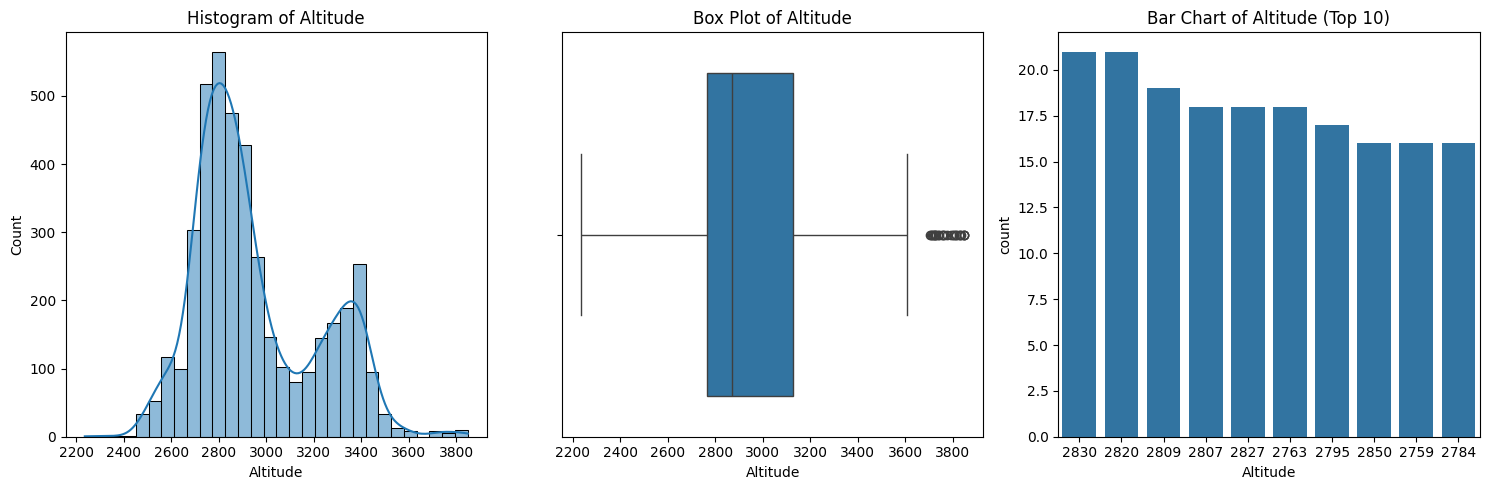

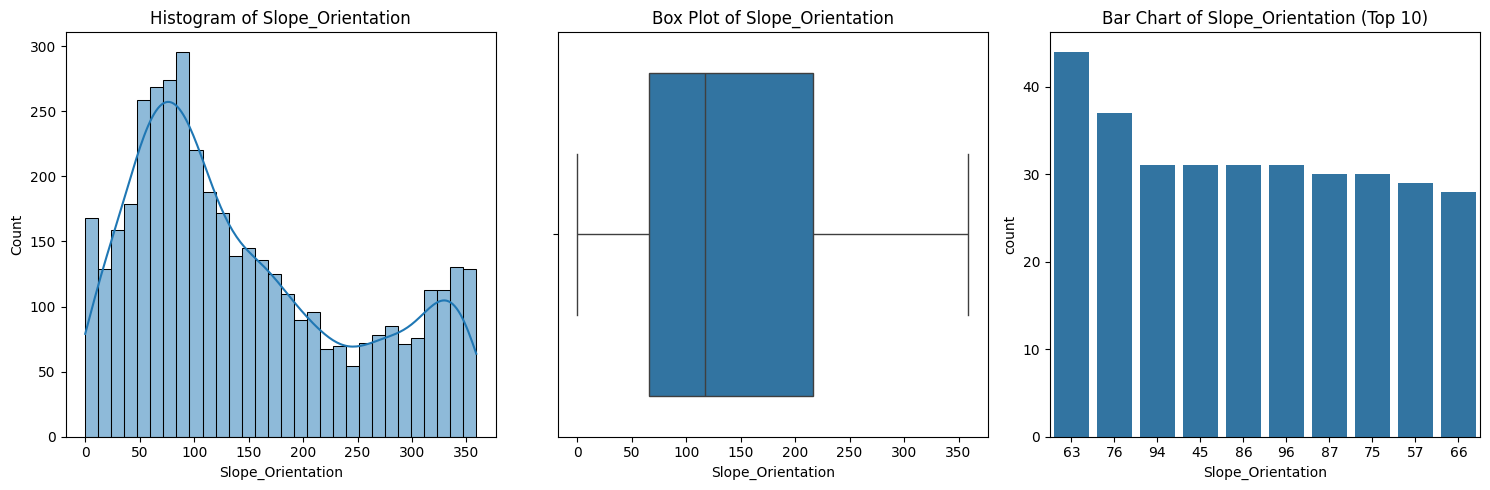

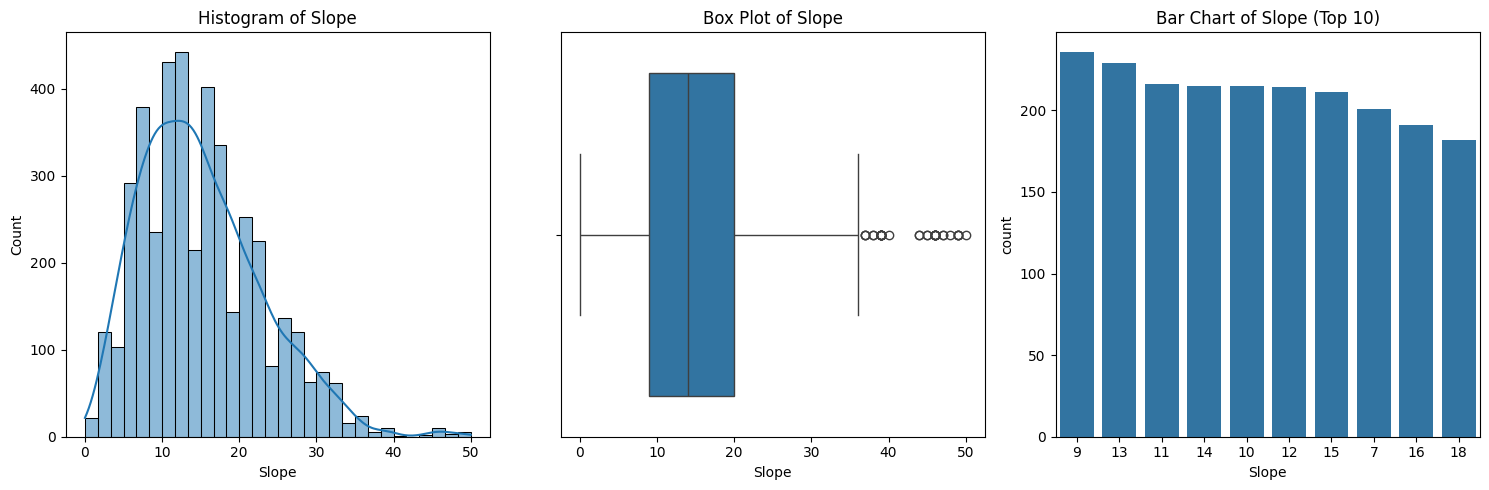

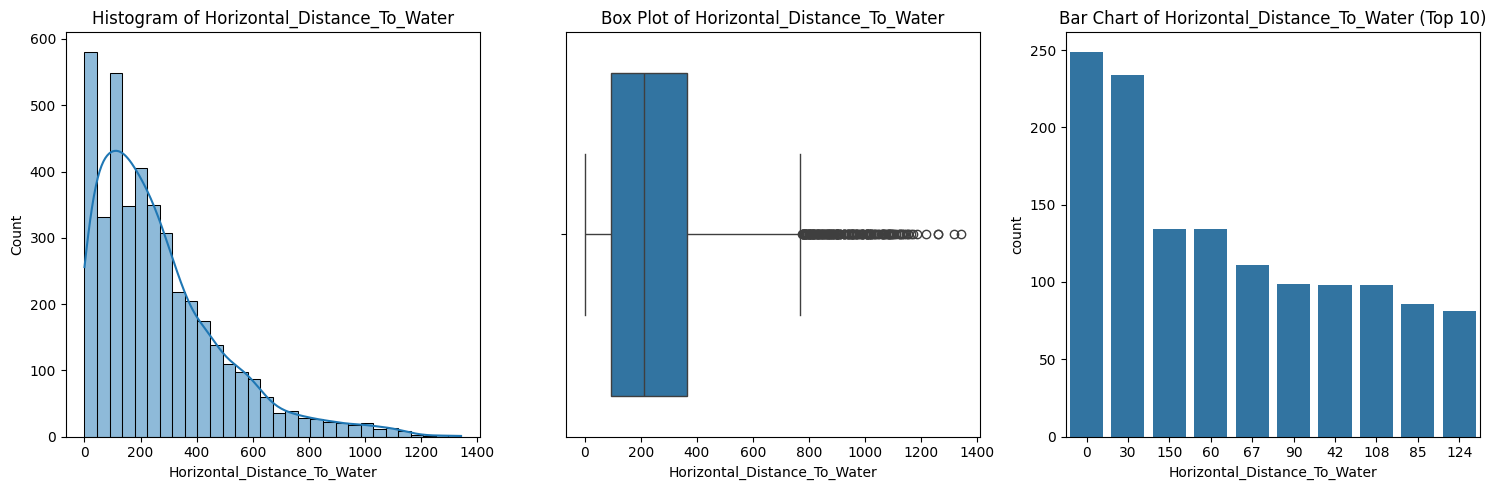

KeyboardInterrupt: 

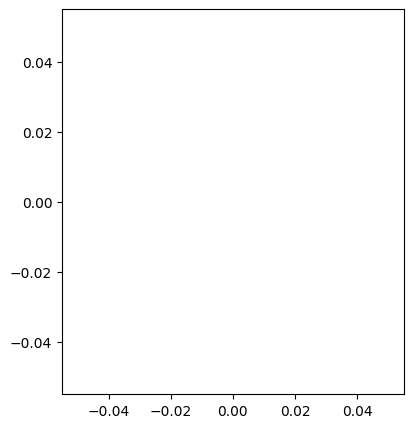

In [67]:
# Passo 2: Univariate Analysis (Distribution of individual features)
def univariate_analysis(data, column_name):
    # with open(f'univariate_analysis/univariate_analysis_{column_name}.txt', 'w') as file:
    #     file.write(f'Univariate Analysis for {column_name}\n')
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()
    mode_value = data[column_name].mode()[0]
    std_dev_value = data[column_name].std()
    range_value = data[column_name].max() - data[column_name].min()
    variance_value = data[column_name].var()
    iqr_value = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    skewness_value = data[column_name].skew()
    kurtosis_value = data[column_name].kurtosis()

    # Frequency Distribution (top 10)
    frequency_distribution = data[column_name].value_counts().head(10)
    # file.write('Frequency Distribution (Top 10):\n')
    # file.write(f'{frequency_distribution}\n\n')

    # Central Tendency
    # file.write(f'Mean: {mean_value}\n')
    # file.write(f'Median: {median_value}\n')
    # file.write(f'Mode: {mode_value}\n\n')

    # Variability
    # file.write(f'Standard Deviation: {std_dev_value}\n')
    # file.write(f'Range: {range_value}\n')
    # file.write(f'Variance: {variance_value}\n')
    # file.write(f'IQR: {iqr_value}\n\n')

    # Skewness and Kurtosis
    # file.write(f'Skewness: {skewness_value}\n')
    # file.write(f'Kurtosis: {kurtosis_value}\n\n')

    # Visualization
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], kde=True, bins=30)
    plt.title(f'Histogram of {column_name}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')

    # Bar Chart (for categorical features)
    if data[column_name].dtype == 'int' or data[column_name].dtype == 'object':
        plt.subplot(1, 3, 3)
        sns.countplot(x=data[column_name], order=data[column_name].value_counts().index[:10])
        plt.title(f'Bar Chart of {column_name} (Top 10)')

    plt.tight_layout()
    # plt.savefig(f'univariate_analysis/univariate_analysis_{column_name}.png')
    plt.show()

variables_to_analyze = [
    dc.ALTITUDE,
    dc.SLOPE_ORIENTATION,
    dc.SLOPE,
    dc.HORIZONTAL_DISTANCE_TO_WATER,
    dc.VERTICAL_DISTANCE_TO_WATER,
    dc.HORIZONTAL_DISTANCE_TO_ROADWAYS,
    dc.SHADOW_INDEX_9,
    dc.SHADOW_INDEX_12,
    dc.SHADOW_INDEX_15,
    dc.HORIZONTAL_DISTANCE_TO_FIRE_POINTS,
    dc.CANOPY_DENSITY,
    dc.RAINFALL_SUMMER,
    dc.RAINFALL_WINTER,
    dc.WIND_EXPOSURE_LEVEL,
    dc.SOIL_TYPE,
    dc.WILDERNESS_AREA,
    dc.VEGETATION_TYPE
]

# Realizar a análise univariada para cada variável
for variable in variables_to_analyze:
    univariate_analysis(dt, variable)

# # Conclusões da Análise Univariada
# conclusions = """
# Conclusões da Análise Univariada:

# 1. A variável 'Altitude' apresenta uma média de 2948, com uma ligeira assimetria positiva (skewness = 0.74). Isto sugere que a maior parte dos valores está concentrada em altitudes mais baixas, com alguns valores mais altos a puxar a média para cima.

# 2. A variável 'Slope_Orientation' também tem uma distribuição assimétrica positiva (skewness = 0.62), indicando que a maioria das orientações de encosta estão em valores mais baixos, com alguns valores mais altos a causar uma cauda longa.

# 3. A variável 'Slope' tem uma moda de 9, indicando que esta inclinação é a mais comum. A assimetria positiva (skewness = 0.77) sugere que a maioria dos valores está abaixo da média, com algumas inclinações mais íngremes.

# 4. A 'Horizontal_Distance_To_Water' apresenta um valor de skewness de 1.38, sugerindo uma distribuição altamente assimétrica positiva. Muitos pontos estão próximos de corpos de água, mas há alguns que estão significativamente mais distantes.

# 5. A 'Vertical_Distance_To_Water' mostra uma assimetria ainda mais pronunciada (skewness = 1.64), indicando que a maioria dos pontos está próxima da água verticalmente, mas alguns têm uma grande distância.

# 6. A 'Horizontal_Distance_To_Roadways' tem uma média elevada (1974) e uma assimetria positiva (skewness = 0.90), sugerindo que a maioria dos pontos está relativamente próxima das estradas, com alguns outliers mais distantes.

# 7. As variáveis 'Shadow_Index_9h', 'Shadow_Index_12h' e 'Shadow_Index_15h' apresentam assimetrias negativas, sugerindo que os valores mais elevados são mais comuns. Isto indica que a maioria das áreas tem uma boa cobertura de sombra durante essas horas.

# 8. A variável 'Horizontal_Distance_To_Fire_Points' apresenta uma distribuição altamente assimétrica positiva (skewness = 1.48), sugerindo que a maioria dos pontos está relativamente próxima de pontos de incêndio, mas há alguns pontos significativamente distantes.

# 9. A 'Canopy_Density' tem uma distribuição relativamente simétrica (skewness = 0.03), indicando uma distribuição equilibrada da densidade de copas.

# 10. As variáveis 'Rainfall_Summer' e 'Rainfall_Winter' apresentam kurtosis negativa, indicando que os dados são menos concentrados em torno da média, com caudas mais pesadas.

# 11. A 'Wilderness_Area' é dominada por dois valores (0 e 2), indicando que a maioria dos pontos pertence a essas duas categorias.

# 12. A 'Vegetation_Type' mostra que a categoria 1 é a mais comum, seguida pela categoria 0, indicando uma predominância desses tipos de vegetação.
# """

# with open('univariate_analysis/univariate_analysis_conclusions.txt', 'w') as file:
#     file.write(conclusions)

In [ ]:
from sklearn.linear_model import LinearRegression

# Passo 2: Univariate Analysis (Distribution of individual features)
def bivariate_analysis(data, column_name):
    last_col = data.columns[-1]
    """with open(f'bivariate_analysis/bivariate_analysis_{column_name}.txt', 'w') as file:
        file.write(f'Bivariate Analysis for {column_name}\n')
        
        describe = data[column_name].describe()
        covariance = data[column_name].cov(data[last_col])
        correlation = data[column_name].corr(data[last_col])

        file.write(f'Describe: {describe}\n')
        file.write(f'Covariance: {covariance}\n')
        file.write(f'Correlation: {correlation}\n\n')"""


    # Visualization
    plt.figure(figsize=(15, 5))

    sns.barplot(data=dt, x=last_col, y=column_name)
   # plt.savefig(f'bivariate_analysis/bar_plot_{column_name}.png')

    sns.displot(data, x= column_name, hue=last_col, kind="kde")
    #plt.savefig(f'bivariate_analysis/dis_plot_kde_{column_name}.png')

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    # Get unique values in the last_col (your categorical variable)
    unique_types = data[last_col].unique()

   
   # Loop over each unique type and perform linear regression
    for i, t in enumerate(unique_types):
        # Filter data for the current type
        subset = data[data[last_col] == t]
        
        X = subset[column_name].values.reshape(-1, 1)
        y = subset[column_name].values
        model = LinearRegression()
        model.fit(X, y)
        
        m = model.coef_[0]
        b = model.intercept_
        
        axes[i].scatter(X, y, color='blue', alpha=0.5)
        
        axes[i].plot(X, model.predict(X), color='red', label=f'y = {m:.2f}x + {b:.2f}')
        
        # Set the title to show the current type and regression equation
        axes[i].set_title(f'{t}')
        axes[i].set_xlabel(column_name)

    # Set the common ylabel for the whole figure
    axes[0].set_ylabel('Values')

    # Display the plot
    plt.suptitle(f'Scatter Plots and Regression Lines for Each Type in {last_col}')
 

    plt.tight_layout()
    #plt.savefig(f'bivariate_analysis/scatter_plot_{column_name}.png')
    plt.show()



numerical_variables_to_analyze = [
    dc.ALTITUDE,
    dc.SLOPE_ORIENTATION,
    dc.SLOPE,
    dc.HORIZONTAL_DISTANCE_TO_WATER,
    dc.VERTICAL_DISTANCE_TO_WATER,
    dc.HORIZONTAL_DISTANCE_TO_ROADWAYS,
    dc.SHADOW_INDEX_9,
    dc.SHADOW_INDEX_12,
    dc.SHADOW_INDEX_15,
    dc.HORIZONTAL_DISTANCE_TO_FIRE_POINTS,
    dc.CANOPY_DENSITY,
    dc.RAINFALL_SUMMER,
    dc.RAINFALL_WINTER,
    dc.WIND_EXPOSURE_LEVEL,
    dc.SOIL_TYPE,
    dc.WILDERNESS_AREA,
  
]

Categorical_variables_to_analyze = [
    dc.SOIL_TYPE,
    dc.WILDERNESS_AREA,
]


# Realizar a análise bivariada para cada variável
for variable in numerical_variables_to_analyze:
    bivariate_analysis(dt, variable)


for variable in Categorical_variables_to_analyze:


   
    plt.figure(figsize=(15, 15))

    sns.countplot(data=bdt, x=variable, hue=dc.VEGETATION_TYPE)
    # Add labels and title
    plt.xlabel(f'{variable}')
    plt.ylabel('Count')
    plt.title('Count of Vegetation Type by 'f'{variable}')
    plt.legend(title='Vegetation Type')

   # plt.savefig(f'bivariate_analysis/Categorical_{variable}.png')

    plt.show()



#covariance Matrix
print("\nCovariance Matrix:")
cov_matrix=dt.cov()

sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Covariance matrix heatmat")

plt.show()


#correlataion matrix
print("\nCorrelation Matrix:")
corr_matrix=dt.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix heatmat")


In [29]:
# Holdout
dtTraining = dt.drop(dc.VEGETATION_TYPE, axis=1)
dtTest = dt[dc.VEGETATION_TYPE]

X_train, X_test, Y_train, Y_test = train_test_split(dtTraining, dtTest, test_size=0.3, random_state=5)

print("------------------------------------------------------")
holdout_logisticRegression  = myRegression.logisticRegression(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_logisticRegressionOptimized =  myRegression.logisticRegressionOptimized(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_linearDiscriminantAnalysis = myRegression.linearDiscriminantAnalysis(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_linearDiscriminantAnalysisOptimized = myRegression.linearDiscriminantAnalysisOptimized(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_quadraticDiscriminantAnalysis = myRegression.quadraticDiscriminantAnalysis(X_train, Y_train, X_test, Y_test)
print("------------------------------------------------------")
holdout_quadraticDiscriminantAnalysisOptimized = myRegression.quadraticDiscriminantAnalysisOptimized(X_train, Y_train, X_test, Y_test)


------------------------------------------------------
Logistic Regression model accuracy on test data (in %): 80.14240506329115
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       403
           1       0.78      0.87      0.82       569
           2       0.94      0.93      0.93       292

    accuracy                           0.80      1264
   macro avg       0.81      0.80      0.81      1264
weighted avg       0.80      0.80      0.80      1264

Confusion Matrix:
[[248 137  18]
 [ 76 493   0]
 [ 19   1 272]]
------------------------------------------------------
Best parameters are:  {'regressor__C': 10}
Best score is:  0.8181865270064173
Logistic Regression model accuracy on test data (in %): 79.90506329113924
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       403
           1       0.78      0.87      0.82       569
          

In [30]:
X = dt.drop(dc.VEGETATION_TYPE, axis=1)
Y = dt[dc.VEGETATION_TYPE]

In [44]:
# Cross Validation (k=5 and k=10)



print("---- Cross Validation Method ----")
crossValidation_logisticRegression5 = myRegression.crossValidation_logisticRegression(X,Y,5)
crossValidation_logisticRegression10 = myRegression.crossValidation_logisticRegression(X,Y,10)
print("------------------------------------------------------")
crossValidation_linearDiscriminantAnalysis5 = myRegression.crossValidation_linearDiscriminantAnalysis(X,Y,5)
crossValidation_linearDiscriminantAnalysis10 = myRegression.crossValidation_linearDiscriminantAnalysis(X,Y,10)
print("------------------------------------------------------")
crossValidation_quadraticDiscriminantAnalysis5 = myRegression.crossValidation_quadraticDiscriminantAnalysis(X,Y,5)
crossValidation_quadraticDiscriminantAnalysis10 = myRegression.crossValidation_quadraticDiscriminantAnalysis(X,Y,10)



---- Cross Validation Method ----
Logistic Regression model accuracy with 5-fold cross-validation (in %): 81.2679520883171
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.69      1404
           1       0.78      0.90      0.84      1944
           2       0.92      0.95      0.94       864

    accuracy                           0.81      4212
   macro avg       0.83      0.82      0.82      4212
weighted avg       0.81      0.81      0.81      4212

Confusion Matrix:
[[ 858  478   68]
 [ 199 1745    0]
 [  41    3  820]]
Logistic Regression model accuracy with 10-fold cross-validation (in %): 81.26763179520664
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.69      1404
           1       0.78      0.90      0.84      1944
           2       0.92      0.95      0.94       864

    accuracy                           0.81      4212
   macro avg  

In [5]:
# Leave One Out Cross Validation (LOOCV)

print("---- Leave One Out Cross Validation Method ----")
leaveOneOutCrossValidation_logisticRegression = myRegression.leaveOneOutCrossValidation_logisticRegression(X,Y)
print("------------------------------------------------------")
leaveOneOutCrossValidation_linearDiscriminantAnalysis = myRegression.leaveOneOutCrossValidation_linearDiscriminantAnalysis(X,Y)
print("------------------------------------------------------")
leaveOneOutCrossValidation_quadraticDiscriminantAnalysis = myRegression.leaveOneOutCrossValidation_quadraticDiscriminantAnalysis(X,Y)


---- Leave One Out Cross Validation Method ----
Logistic Regression model accuracy with leave-one-out cross-validation (in %): 81.19658119658119
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1404
           1       0.79      0.90      0.84      1944
           2       0.92      0.94      0.93       864

    accuracy                           0.81      4212
   macro avg       0.83      0.82      0.82      4212
weighted avg       0.81      0.81      0.81      4212

Confusion Matrix:
[[ 864  473   67]
 [ 204 1740    0]
 [  45    3  816]]
------------------------------------------------------
Linear Discriminant Analysis model accuracy with leave-one-out cross-validation (in %): 80.34188034188034
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.54      0.65      1404
           1       0.78      0.91      0.84      1944
           2       0.86      0.

In [6]:
# Bootstrap

print("---- Bootstrap Resampling Method ----")
bootstrap_logisticRegression = myRegression.bootstrap_logisticRegression(X_train, Y_train, X_test, Y_test,100)
print("------------------------------------------------------")
bootstrap_linearDiscriminantAnalysis = myRegression.bootstrap_linearDiscriminantAnalysis(X_train, Y_train, X_test, Y_test,100)
print("------------------------------------------------------")
bootstrap_quadraticDiscriminantAnalysis = myRegression.bootstrap_quadraticDiscriminantAnalysis(X_train, Y_train, X_test, Y_test,100)

---- Bootstrap Resampling Method ----
Bootstrap Mean Accuracy: 79.88%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       403
           1       0.00      0.00      0.00       569
           2       0.23      1.00      0.38       292

    accuracy                           0.23      1264
   macro avg       0.08      0.33      0.13      1264
weighted avg       0.05      0.23      0.09      1264

Confusion Matrix:
 [[  0   0 403]
 [  0   0 569]
 [  0   0 292]]
------------------------------------------------------
Bootstrap Mean Accuracy: 79.45%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1001
           1       0.00      0.00      0.00      1375
           2       0.19      1.00      0.33       572

    accuracy                           0.19      2948
   macro avg       0.06      0.33      0.11      2948
weighted avg       0.04 

In [7]:
# Função para comparar os resultados e identificar o melhor método para cada modelo
results = {
    'Logistic Regression': {
        'Holdout': holdout_logisticRegression,
        'Holdout Optimized': holdout_logisticRegressionOptimized,
        'Cross Validation (k=5)': crossValidation_logisticRegression5,
        'Cross Validation (k=10)': crossValidation_logisticRegression10,
        'LOOCV': leaveOneOutCrossValidation_logisticRegression,
        'Bootstrap': bootstrap_logisticRegression
    },
    'Linear Discriminant Analysis': {
        'Holdout': holdout_linearDiscriminantAnalysis,
        'Holdout Optimized': holdout_linearDiscriminantAnalysisOptimized,
        'Cross Validation (k=5)': crossValidation_linearDiscriminantAnalysis5,
        'Cross Validation (k=10)': crossValidation_linearDiscriminantAnalysis10,
        'LOOCV': leaveOneOutCrossValidation_linearDiscriminantAnalysis,
        'Bootstrap': bootstrap_linearDiscriminantAnalysis
    },
    'Quadratic Discriminant Analysis': {
        'Holdout': holdout_quadraticDiscriminantAnalysis,
        'Holdout Optimized': holdout_quadraticDiscriminantAnalysisOptimized,
        'Cross Validation (k=5)': crossValidation_quadraticDiscriminantAnalysis5,
        'Cross Validation (k=10)': crossValidation_quadraticDiscriminantAnalysis10,
        'LOOCV': leaveOneOutCrossValidation_quadraticDiscriminantAnalysis,
        'Bootstrap': bootstrap_quadraticDiscriminantAnalysis
    }
}

best_scores = {}

for model, methods in results.items():
    best_method = max(methods, key=methods.get)
    best_score = methods[best_method]
    best_scores[model] = (best_method, best_score)

for model, (method, score) in best_scores.items():
    print(f"Modelo: {model}")
    print(f"Melhor Método: {method}")
    print(f"Score: {score}")
    print("------------------------------------------------------")

Modelo: Logistic Regression
Melhor Método: Cross Validation (k=5)
Score: 81.2679520883171
------------------------------------------------------
Modelo: Linear Discriminant Analysis
Melhor Método: Holdout
Score: 80.61708860759494
------------------------------------------------------
Modelo: Quadratic Discriminant Analysis
Melhor Método: LOOCV
Score: 82.54985754985755
------------------------------------------------------


In [8]:
#Determine the best alpha for the algortihms
print("----------Ridge Regression best alpha------")
bestAlphaForRidgeRegression5=myRegression.ridgeCrossValidation(X, Y, 5)
bestAlphaForRidgeRegression10=myRegression.ridgeCrossValidation(X,Y,10)

print("--------Lasso Regression best alpha----------------------")
bestAlphaForLassoRegression5=myRegression.LassoCrossValidatiln(X, Y, 5)
bestAlphaForLassoRegression10=myRegression.LassoCrossValidatiln(X, Y, 10)

print("----------Elastic Net Regression best alpha----------")
bestAlphaForElasticNet5=myRegression.elasticNetValidation(X, Y, 5)
bestAlphaForElasticNet10=myRegression.elasticNetValidation(X, Y, 10)



----------Ridge Regression best alpha------
Best alpha for Ridge regression: 1.0
Coeficient for Ridge regression: [ 2.91725562e-06  1.56842657e-03  4.35420297e-04 -3.52523529e-03
 -5.75084970e-04  4.45950403e-04 -1.01563265e-04  2.56883585e-03
 -1.75426048e-03 -9.81680879e-04  1.44444195e-05 -2.68028691e-04
  1.71827660e-04  3.65536367e-06  2.00513636e-04  1.13459387e-02
  1.25830701e-01]
Best alpha for Ridge regression: 10.0
Coeficient for Ridge regression: [ 2.96330893e-06  1.56862663e-03  4.35094685e-04 -3.51220225e-03
 -5.74995541e-04  4.46502498e-04 -1.01605751e-04  2.57384882e-03
 -1.75595060e-03 -9.73219176e-04  1.43346414e-05 -2.68891331e-04
  1.71874367e-04  3.64505598e-06  2.00706763e-04  1.13369388e-02
  1.25242896e-01]
--------Lasso Regression best alpha----------------------
Best alpha for Lasso regression: 0.1
Coeficient for Lasso regression: [ 1.23480551e-05  1.65738001e-03  2.75788653e-04 -0.00000000e+00
 -5.39985324e-04  4.47361756e-04 -1.12060406e-04  1.30091447e-03
 

In [9]:
#Determine the best alpha for the algortihms
print("----------Ridge Regression best alpha------")
bestAlphaForRidgeRegression5=myRegression.ridgeCrossValidation(X, Y, 5)
bestAlphaForRidgeRegression10=myRegression.ridgeCrossValidation(X,Y,10)

print("--------Lasso Regression best alpha----------------------")
bestAlphaForLassoRegression5=myRegression.LassoCrossValidatiln(X, Y, 5)
bestAlphaForLassoRegression10=myRegression.LassoCrossValidatiln(X, Y, 10)

print("----------Elastic Net Regression best alpha----------")
bestAlphaForElasticNet5=myRegression.elasticNetValidation(X, Y, 5)
bestAlphaForElasticNet10=myRegression.elasticNetValidation(X, Y, 10)



----------Ridge Regression best alpha------
Best alpha for Ridge regression: 1.0
Coeficient for Ridge regression: [ 2.91725562e-06  1.56842657e-03  4.35420297e-04 -3.52523529e-03
 -5.75084970e-04  4.45950403e-04 -1.01563265e-04  2.56883585e-03
 -1.75426048e-03 -9.81680879e-04  1.44444195e-05 -2.68028691e-04
  1.71827660e-04  3.65536367e-06  2.00513636e-04  1.13459387e-02
  1.25830701e-01]
Best alpha for Ridge regression: 10.0
Coeficient for Ridge regression: [ 2.96330893e-06  1.56862663e-03  4.35094685e-04 -3.51220225e-03
 -5.74995541e-04  4.46502498e-04 -1.01605751e-04  2.57384882e-03
 -1.75595060e-03 -9.73219176e-04  1.43346414e-05 -2.68891331e-04
  1.71874367e-04  3.64505598e-06  2.00706763e-04  1.13369388e-02
  1.25242896e-01]
--------Lasso Regression best alpha----------------------
Best alpha for Lasso regression: 0.1
Coeficient for Lasso regression: [ 1.23480551e-05  1.65738001e-03  2.75788653e-04 -0.00000000e+00
 -5.39985324e-04  4.47361756e-04 -1.12060406e-04  1.30091447e-03
 

In [10]:
CforLogistic=myRegression.bestCforLogictic(X, Y, 5)
CforLogistic2=myRegression.bestCforLogictic(X, Y, 10)

   param_C  mean_test_score  rank_test_score
0    0.001         0.737907                1
1    0.010         0.737610                2
2    0.100         0.737610                2
3    1.000         0.737610                2
4   10.000         0.737610                2
5  100.000         0.737610                2
   param_C  mean_test_score  rank_test_score
3    1.000         0.739386                1
2    0.100         0.739386                1
1    0.010         0.739089                3
0    0.001         0.739089                3
4   10.000         0.739089                3
5  100.000         0.739089                3


In [ ]:
Ridge_logisticRegression=myRegression.logisticRegressionRidgeLasso(X, Y, 'l1', 0.1)
lasso_logisticRegression=myRegression.logisticRegressionRidgeLasso(X, Y, 'l2', 0.1)

ElasticNetl1=myRegression.logisticRegressionElastic(X, Y, 0.5, 0.1)
ElasticNetl1=myRegression.logisticRegressionElastic(X, Y, 0.3, 0.1)

Logistic Regression model accuracy on test data (in %): 79.00355871886121
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       313
           1       0.74      0.92      0.82       368
           2       0.89      0.93      0.91       162

    accuracy                           0.79       843
   macro avg       0.82      0.80      0.80       843
weighted avg       0.80      0.79      0.78       843

Confusion Matrix:
[[179 116  18]
 [ 31 337   0]
 [ 11   1 150]]
Coefficients: [[ 0.02839622  0.          0.         -0.1856364   0.34413829  0.
   0.07931334 -0.26728342  0.          0.09036351  0.          0.
  -0.04327868 -0.01613215  0.         -0.05804505 -0.10673756]
 [ 0.         -1.58552176  0.30128987  0.05391868  0.          0.24525854
  -0.23557259  0.22600858  0.09595501  0.         -0.38810344  0.
   0.          0.         -0.01565668  0.          0.25526323]
 [ 0.          4.82538916  0.          0.     

: 

In [31]:
X =dt.drop([dc.VEGETATION_TYPE, dc.CANOPY_DENSITY, dc.RAINFALL_SUMMER, dc.RAINFALL_WINTER, dc.VERTICAL_DISTANCE_TO_WATER], axis=1)
dtTraining =dt.drop([dc.VEGETATION_TYPE, dc.CANOPY_DENSITY, dc.RAINFALL_SUMMER, dc.RAINFALL_WINTER, dc.VERTICAL_DISTANCE_TO_WATER], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(dtTraining, dtTest, test_size=0.3, random_state=5)

X

Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0     14537      3166                198      6                           192   
1      1154      2877                342     13                           450   
2     14507      3103                 48      7                             0   
3      7196      2950                269     39                           450   
4      1801      2868                332     17                            60   
...     ...       ...                ...    ...                           ...   
4207   8078      3319                195     11                             0   
4208   7815      3379                340     13                           911   
4209   9482      3300                  5     11                           488   
4210  14428      3431                180     11                           443   
4211   2113      3266                 67     14                            67   

      Horizontal_Distance_To_Roadways  Shadow_Index_9h  Shadow_Index_12h  \
0                                3137              218               245   
1                                 618              193               220   
2                                1034              223               225   
3                                1528               95               221   
4                                1718              177               215   
...                               ...              ...               ...   
4207                             2666              218               250   
4208                             1216              192               221   
4209                             2758              205               218   
4210                             4198              224               247   
4211                             2300              233               211   

      Shadow_Index_15h  Horizontal_Distance_To_Fire_Points  \
0                  163                                1253   
1                  166                                2285   
2                  137                                2070   
3                  248                                1595   
4                  176                                2613   
...                ...                                 ...   
4207               165                                 541   
4208               167                                1914   
4209               149                                2287   
4210               154                                3131   
4211               107                                2805   

      Wind_Exposure_Level  Soil_Type  Wilderness_Area  
0                   19.95         22                2  
1                   12.01         13                0  
2                   48.18         11                0  
3                   54.54         23                2  
4                   62.79         23                2  
...                   ...        ...              ...  
4207                39.75         28                2  
4208                55.54         28                2  
4209                31.72         28                2  
4210                29.51         23                2  
4211                28.71         29                0  

[4212 rows x 13 columns]

In [12]:
cvlogisticnewlassso=myRegression.crossValidation_logisticRegressionWithLasso(X,Y, 5,'l1', 0.1)
cvlogisticnewridge=myRegression.crossValidation_logisticRegressionWithLasso(X,Y, 10,'l1', 0.1)


Logistic Regression model accuracy with 5-fold cross-validation (in %): 81.33929552581974
Logistic Regression model accuracy with 10-fold cross-validation (in %): 81.26751922189325


In [13]:
bootstrap_logisticLasso=myRegression.bootstrap_logisticRegressionRegularization(X_train,Y_train,100, 'l1', 0.1)
bootstrap_logisticReg=myRegression.bootstrap_logisticRegressionRegularization(X_train,Y_train,100, 'l2', 0.1)

Bootstrap Mean Accuracy: 81.44%
Bootstrap Mean Accuracy: 81.19%


In [14]:
holdout_logisticLasso=myRegression.logisticRegressionRegularization(X_train, Y_train, X_test, Y_test, 'l1', 0.1)
holdout_logisticReg=myRegression.logisticRegressionRegularization(X_train, Y_train, X_test, Y_test, 'l2', 0.1)



Logistic Regression model accuracy on test data (in %): 80.5379746835443
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       403
           1       0.78      0.88      0.83       569
           2       0.94      0.94      0.94       292

    accuracy                           0.81      1264
   macro avg       0.82      0.81      0.81      1264
weighted avg       0.80      0.81      0.80      1264

Confusion Matrix:
[[242 142  19]
 [ 68 501   0]
 [ 16   1 275]]
Logistic Regression model accuracy on test data (in %): 79.74683544303798
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       403
           1       0.78      0.87      0.82       569
           2       0.93      0.93      0.93       292

    accuracy                           0.80      1264
   macro avg       0.81      0.80      0.80      1264
weighted avg       0.79      0.80   

In [16]:
loo_loologistiLasso=myRegression.leaveOneOutCrossValidation_logisticRegressionRegularization(X, Y, 'l1', 0.1)
loo_loologisticReg=myRegression.leaveOneOutCrossValidation_logisticRegressionRegularization(X, Y, 'l2', 0.1)

Logistic Regression model accuracy with leave-one-out cross-validation (in %): 81.50522317188984
Logistic Regression model accuracy with leave-one-out cross-validation (in %): 81.14909781576448


In [ ]:
#Parte 2

In [32]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(np.unique(y_train))


[0 1 2]


In [43]:
reload(Regression)

myRegression = Regression.Regression()


In [ ]:
svm_linear=myRegression.build_svm_classifier(X, Y, 'linear')
svm_rbf=myRegression.build_svm_classifier(X, Y, 'rbf')
svm_poly=myRegression.build_svm_classifier(X, Y, 'poly')
svm_sigmoid=myRegression.build_svm_classifier(X, Y, 'sigmoid')

In [7]:
svm_grid_linear=myRegression.gridSearchSVM(X, Y, 'linear')
svm_grid_rbf=myRegression.gridSearchSVM(X, Y, 'rbf')
svm_grid_poly=myRegression.gridSearchSVM(X, Y, 'poly')
svm_grid_sigmoid=myRegression.gridSearchSVM(X, Y, 'sigmoid')

Fitting 3 folds for each of 6912 candidates, totalling 20736 fits
Best Parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'max_iter': 2000, 'probability': True, 'shrinking': False, 'tol': 0.001, 'verbose': False}
Fitting 3 folds for each of 6912 candidates, totalling 20736 fits
Best Parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'max_iter': 2000, 'probability': True, 'shrinking': True, 'tol': 0.1, 'verbose': False}
Fitting 3 folds for each of 6912 candidates, totalling 20736 fits
Best Parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 1.0, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 'scale', 'max_iter': 2000, 'probability': True, 'shrinking': True, 'tol': 0.1, 'verbose': False}
Fitting 3 folds for each o

In [13]:
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'max_iter': 1000, 'probability': True, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'max_iter': 2000, 'probability': True, 'shrinking': True, 'tol': 0.1, 'verbose': False}
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 1.0, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 'scale', 'max_iter': 2000, 'probability': True, 'shrinking': True, 'tol': 0.1, 'verbose': False}
{'C': 0.1, 'break_ties': True, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'auto', 'max_iter': 2000, 'probability': True, 'shrinking': True, 'tol': 0.001, 'verbose': False}
svm_linear_complete=myRegression.build_svm_classifier_complete(X, Y, 'linear', 0.1, 2, 'scale', 0.0, True, True, 0.001, 200, None, False, 1000,'ovr', False)
svm_rbf_complete=myRegression.build_svm_classifier_complete(X, Y, 'rbf', 1, 2, 'scale', 0.0, True, True, 0.01, 200, None, False, 2000,'ovr', False)

svm_poly_complete=myRegression.build_svm_classifier_complete(X, Y, 'poly', 1, 4, 'scale', 1.0, True, True, 0.01, 200, 'balanced', False, 2000,'ovr', False)
svm_sigmoid_complete=myRegression.build_svm_classifier_complete(X, Y, 'sigmoid', 0.1, 2, 'auto', 0.0, True, True, 0.001, 200, None, False, 2000,'ovr', True)


Accuracy with linear kernel: 0.5823

Mean Squared Error (MSE): 0.7595
Mean Absolute Error (MAE): 0.5316
Root Mean Squared Error (RMSE): 0.8715
Accuracy with rbf kernel: 0.7674

Mean Squared Error (MSE): 0.3536
Mean Absolute Error (MAE): 0.2729
Root Mean Squared Error (RMSE): 0.5947
Accuracy with poly kernel: 0.7658

Mean Squared Error (MSE): 0.2959
Mean Absolute Error (MAE): 0.2547
Root Mean Squared Error (RMSE): 0.5440
Accuracy with sigmoid kernel: 0.4502

Mean Squared Error (MSE): 0.5498
Mean Absolute Error (MAE): 0.5498
Root Mean Squared Error (RMSE): 0.7415


In [ ]:
#After Step 4
svm_linear=myRegression.build_svm_classifier(X, Y, 'linear')
svm_rbf=myRegression.build_svm_classifier(X, Y, 'rbf')
svm_poly=myRegression.build_svm_classifier(X, Y, 'poly')
svm_sigmoid=myRegression.build_svm_classifier(X, Y, 'sigmoid')

Accuracy: 90.90189873417721 
Train Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86       421
           1       0.90      0.93      0.92       584
           2       0.96      0.97      0.96       259

    accuracy                           0.91      1264
   macro avg       0.92      0.91      0.91      1264
weighted avg       0.91      0.91      0.91      1264


Confusion Matrix [[352  59  10]
 [ 37 546   1]
 [  8   0 251]]
Error Rate: 0.09098101265822785


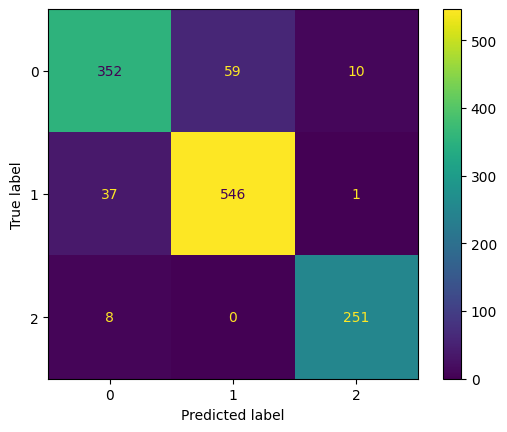

In [33]:
dt_model, dt_graph =myRegression.dt_function(X, Y)


In [34]:
predictors=X.columns.tolist()
print(dt.shape[1])
print(len(predictors))


18
13


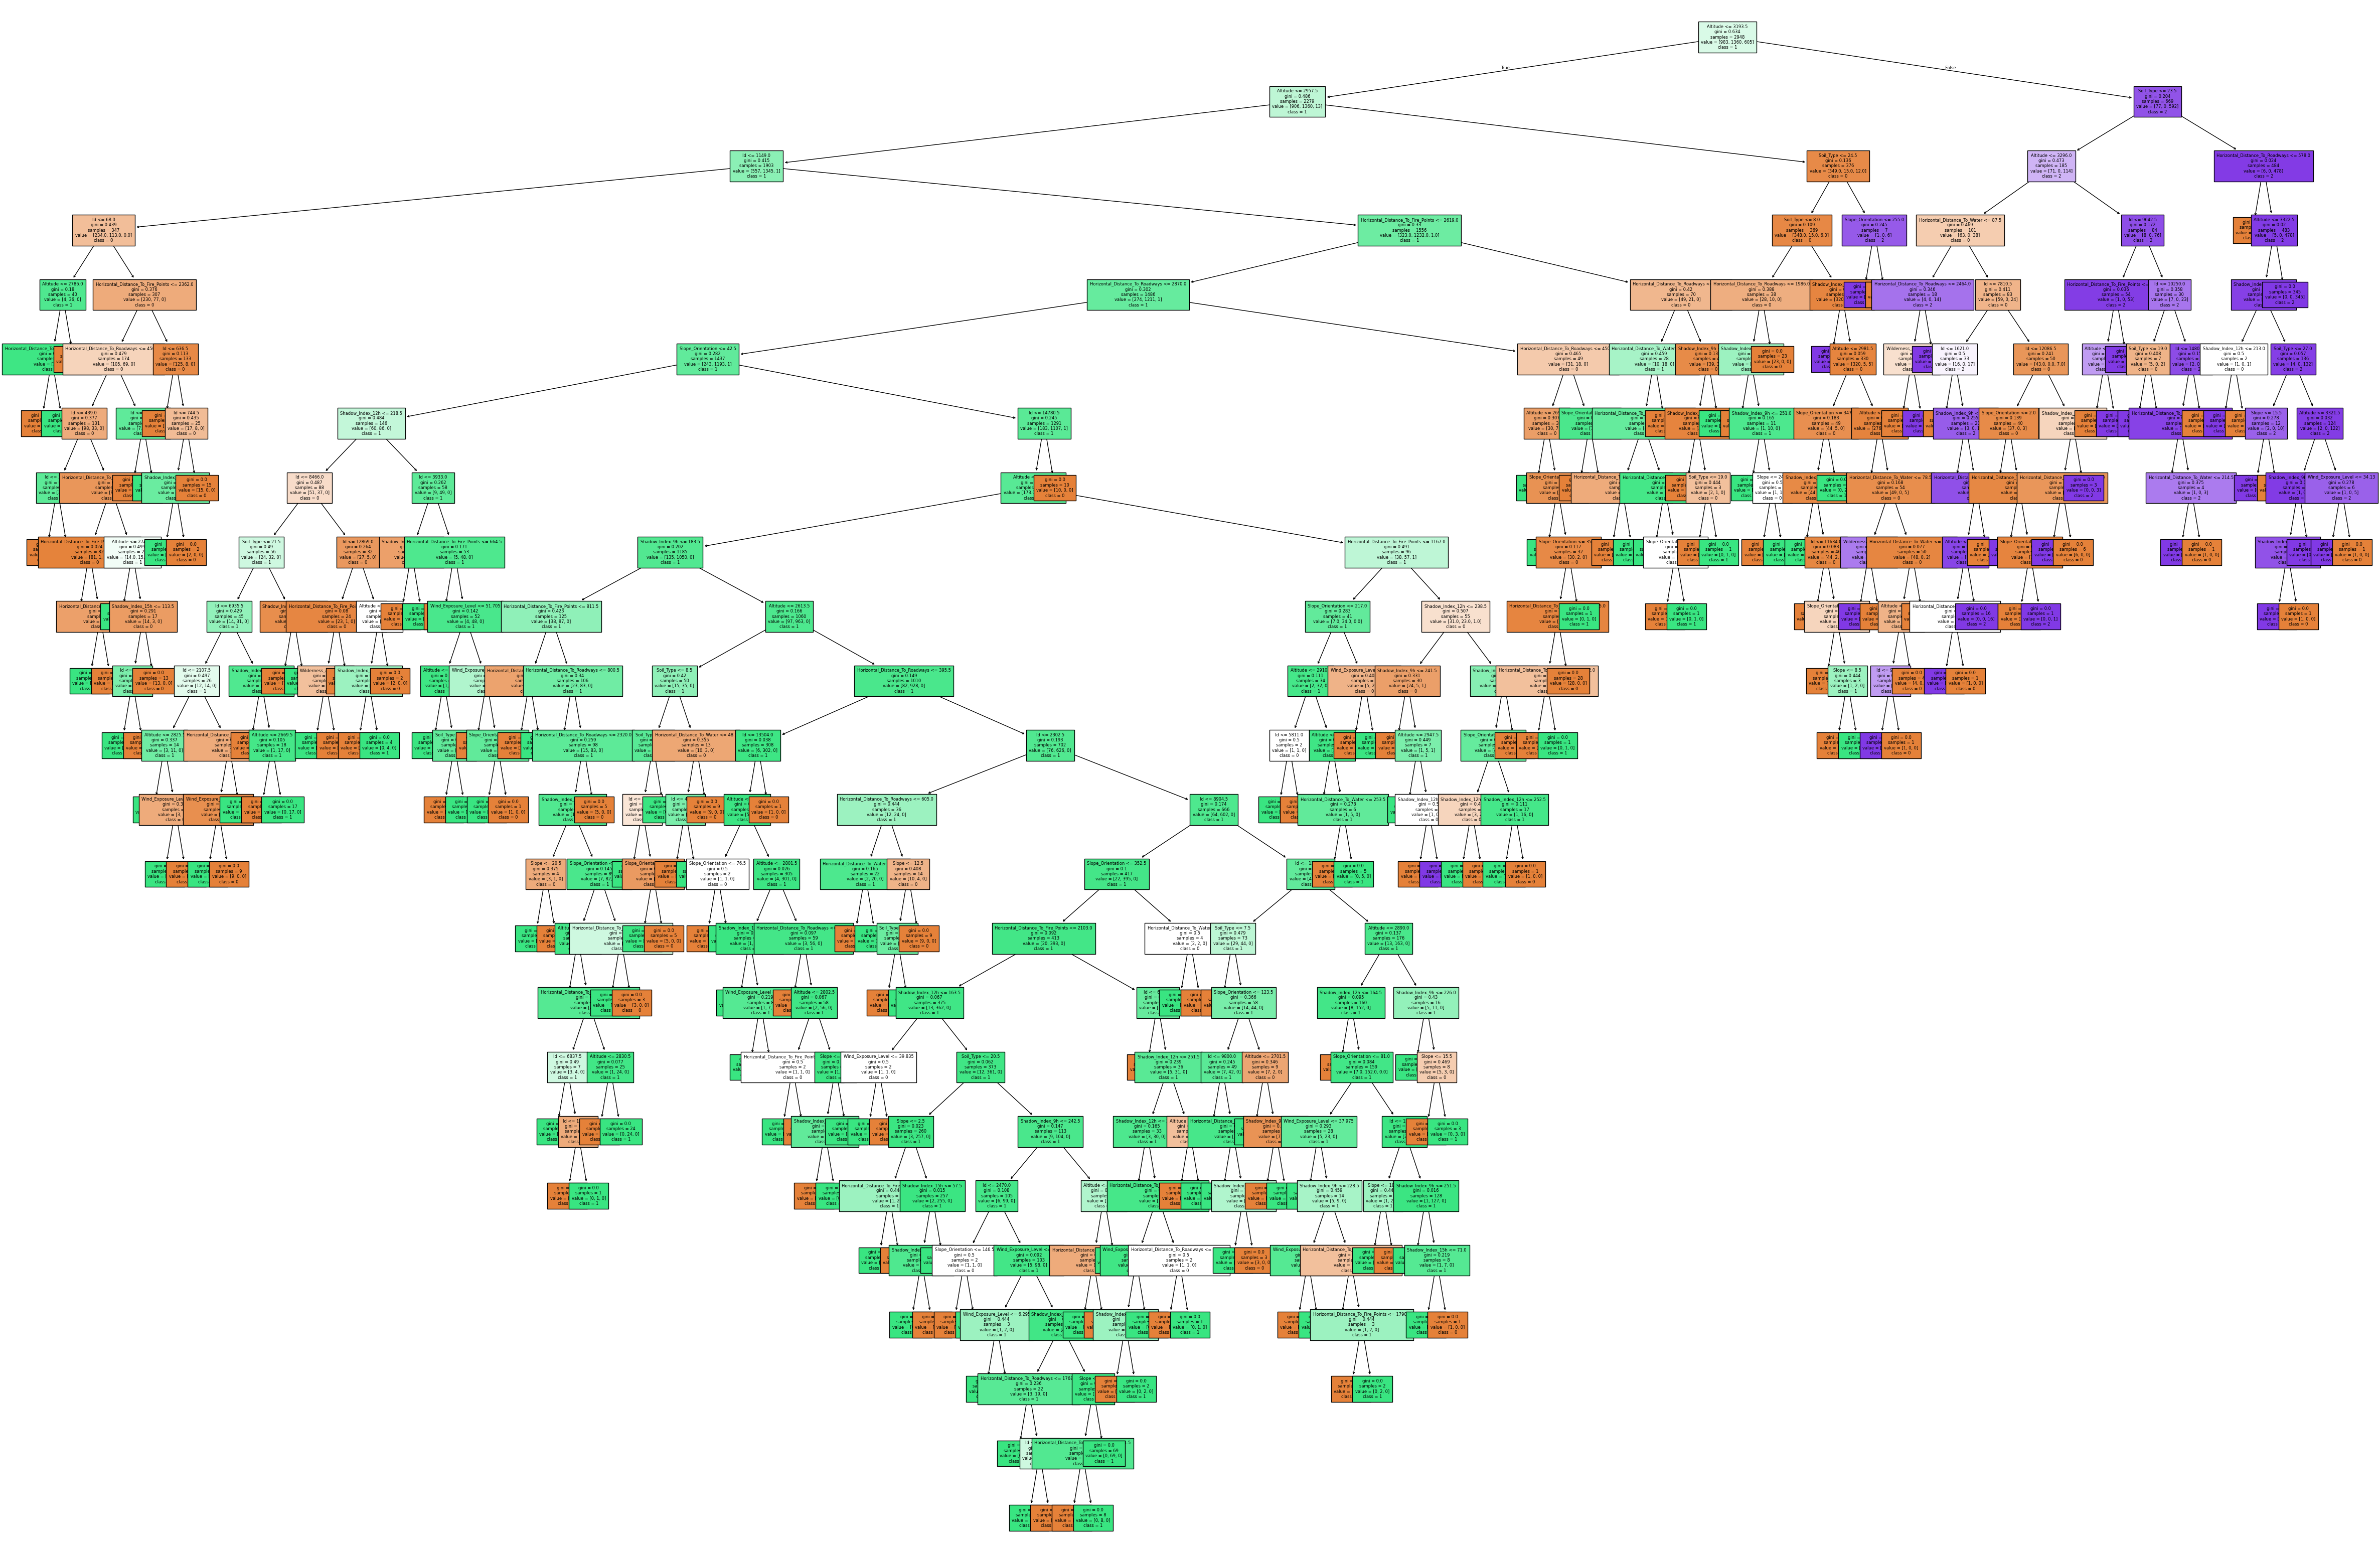

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60, 40))
plot_tree(dt_graph, filled=True,
          feature_names=predictors, class_names=['0', '1','2'],
          fontsize=6)
plt.show()

In [36]:
feature_importances = dt_graph.feature_importances_
pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], 
                                                                                                ascending=False)

Importance
Altitude                              0.526127
Id                                    0.165069
Horizontal_Distance_To_Roadways       0.064022
Horizontal_Distance_To_Fire_Points    0.052961
Soil_Type                             0.048571
Slope_Orientation                     0.032206
Horizontal_Distance_To_Water          0.026366
Shadow_Index_9h                       0.025069
Shadow_Index_12h                      0.020510
Shadow_Index_15h                      0.015522
Wind_Exposure_Level                   0.010867
Slope                                 0.009358
Wilderness_Area                       0.003351

In [ ]:
dt_graph=myRegression.grid_search_decision_tree(X, Y)

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 40, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


Accuracy: 89.71518987341773 
Train Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       421
           1       0.88      0.92      0.90       584
           2       0.98      0.97      0.97       259

    accuracy                           0.90      1264
   macro avg       0.91      0.90      0.91      1264
weighted avg       0.90      0.90      0.90      1264


Confusion Matrix [[345  71   5]
 [ 46 537   1]
 [  7   0 252]]
Error Rate: 0.10284810126582279


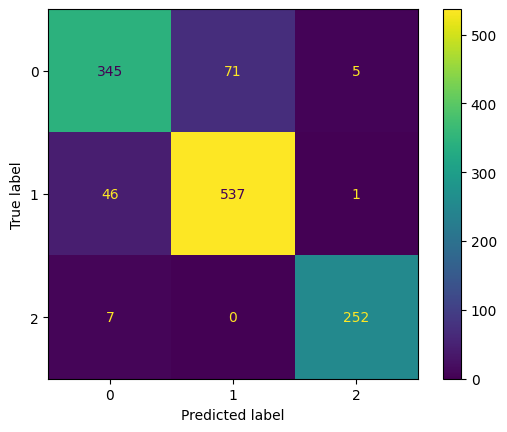

In [37]:
dt_model, dt_graph=myRegression.dt_function(X, Y, 1)

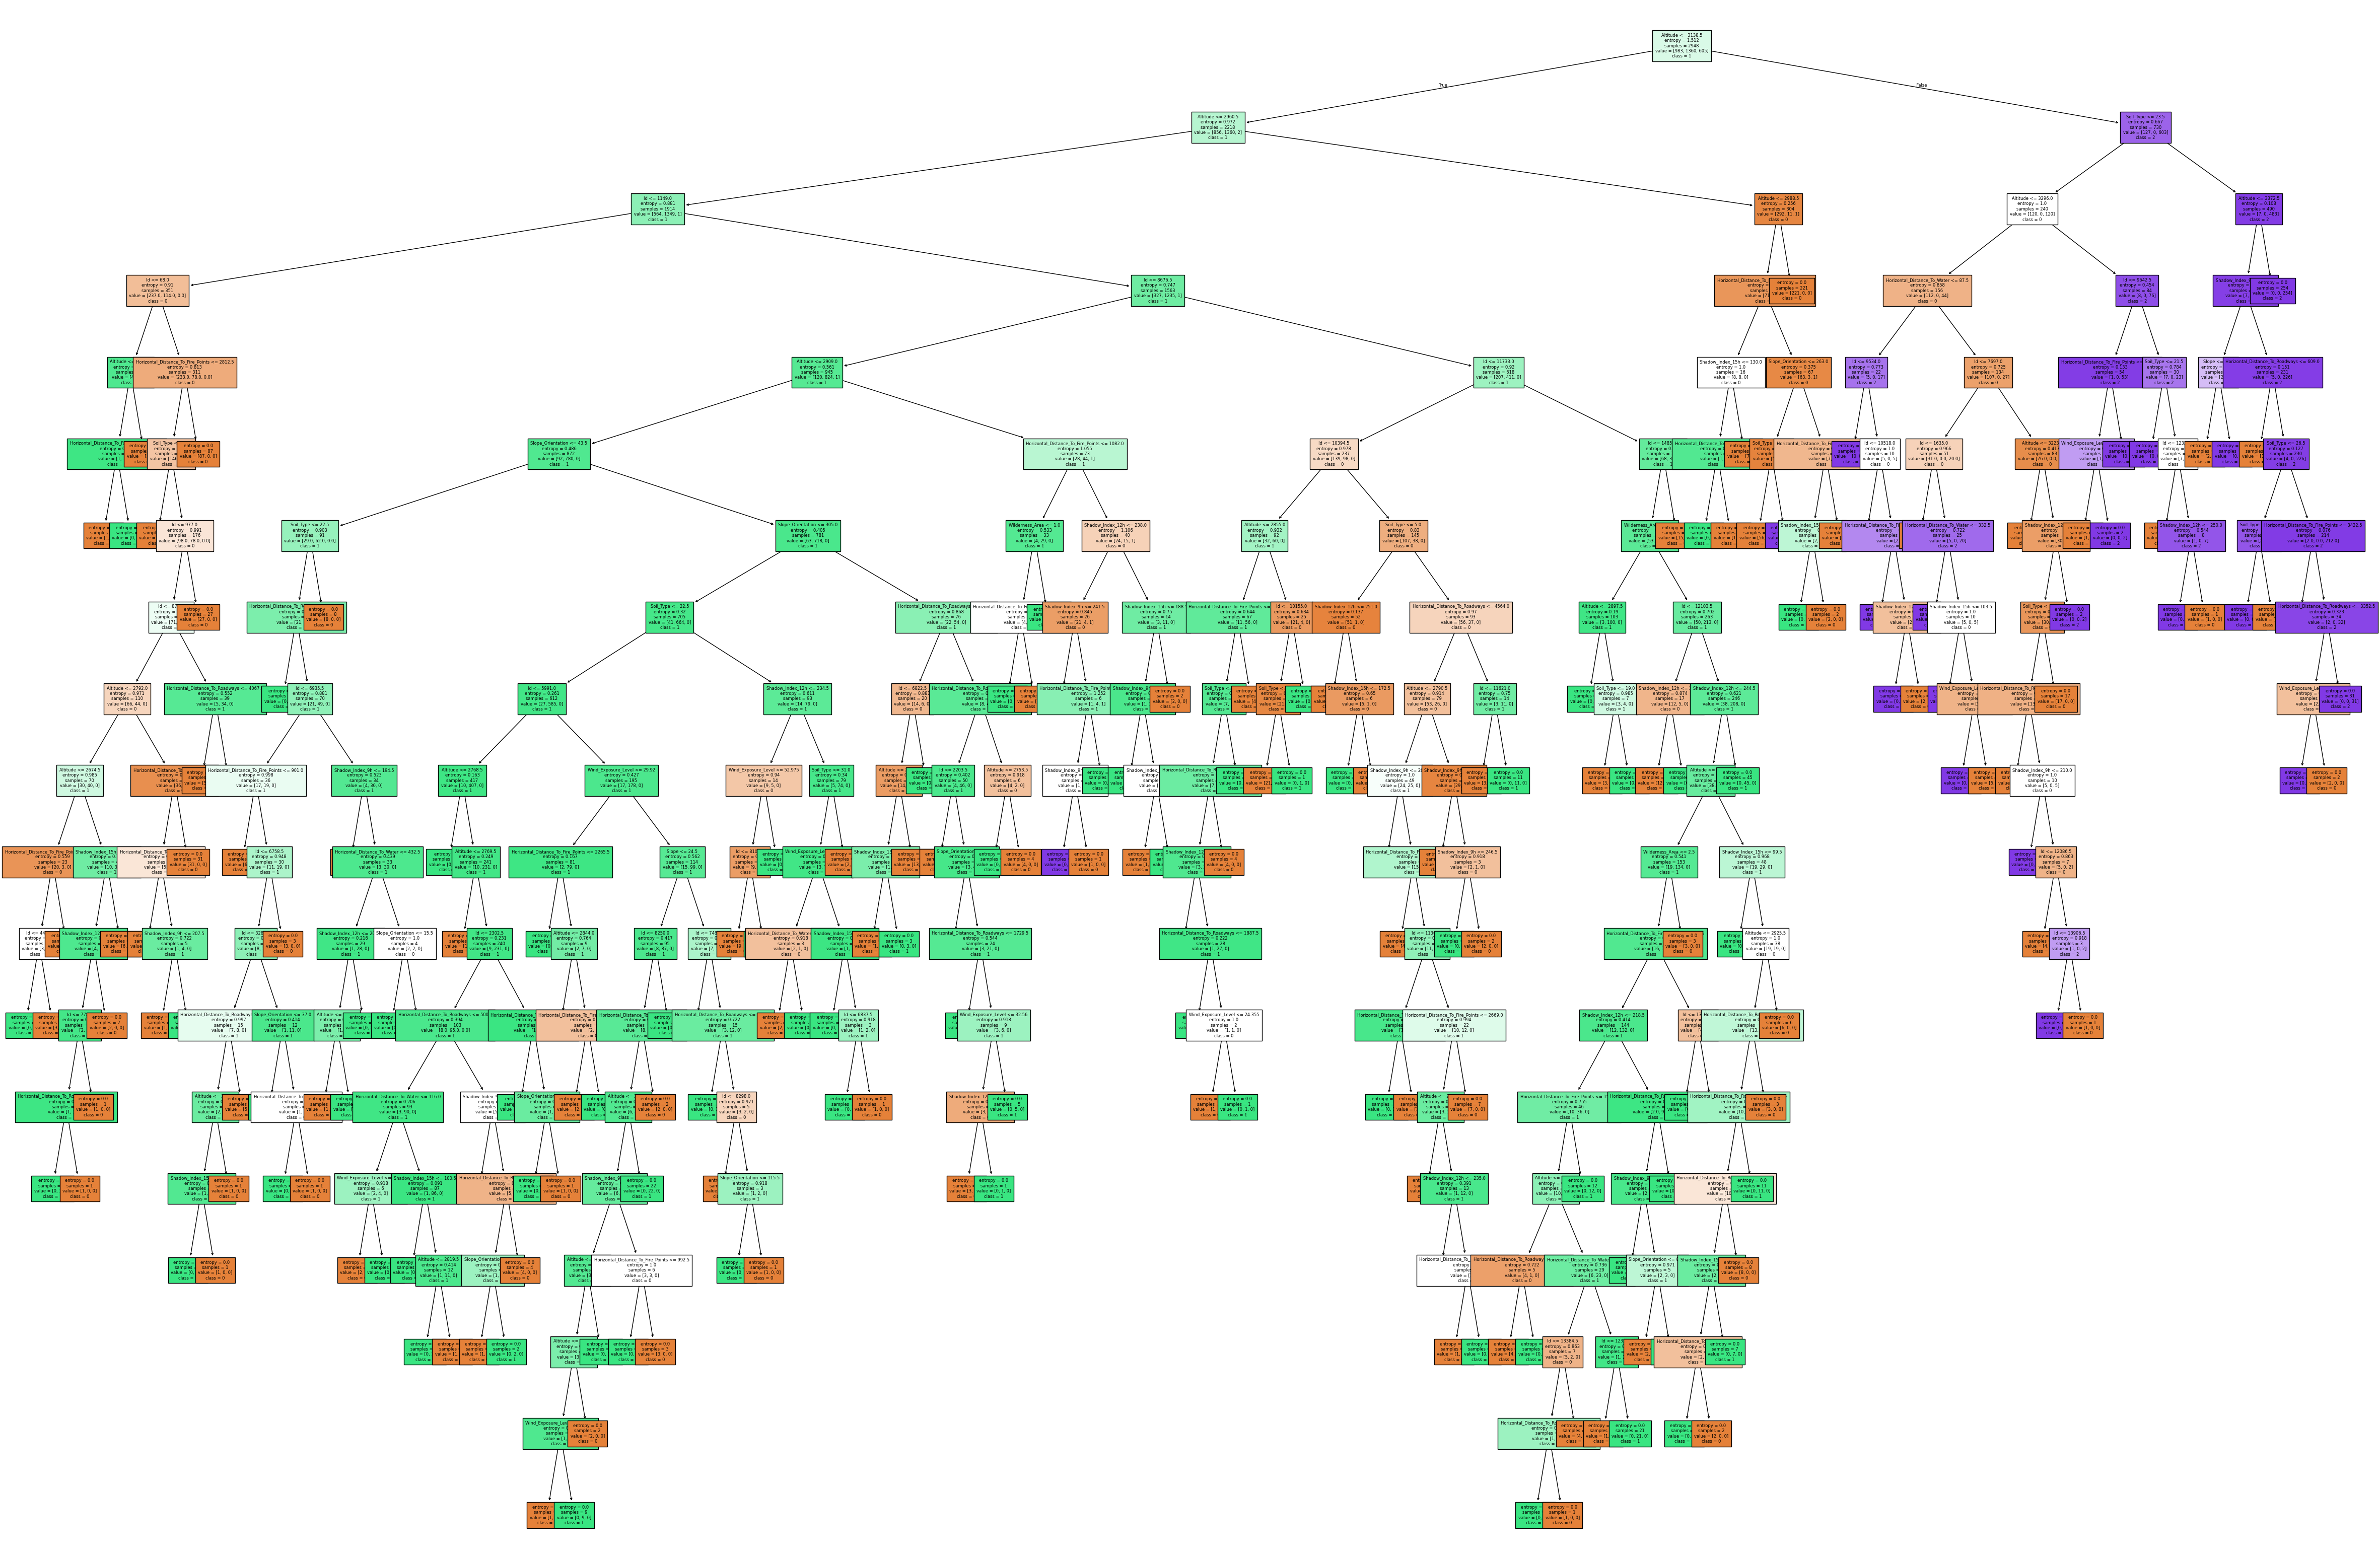

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60, 40))
plot_tree(dt_graph, filled=True,
          feature_names=predictors, class_names=['0', '1','2'],
          fontsize=6)
plt.show()

Accuracy: 93.35443037974683 
Train Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.89       421
           1       0.91      0.98      0.94       584
           2       0.97      0.98      0.97       259

    accuracy                           0.93      1264
   macro avg       0.94      0.93      0.94      1264
weighted avg       0.94      0.93      0.93      1264


Confusion Matrix:
 [[356  58   7]
 [ 13 571   0]
 [  6   0 253]]
Error Rate: 0.06645569620253164


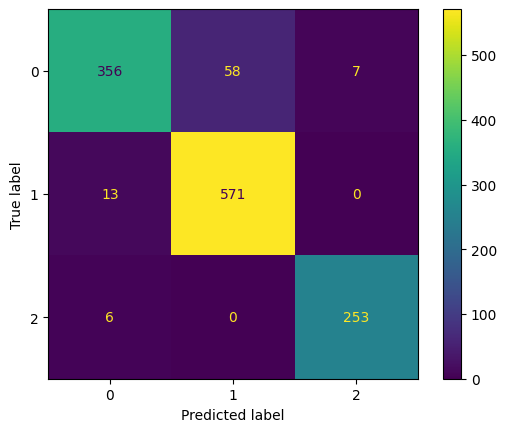

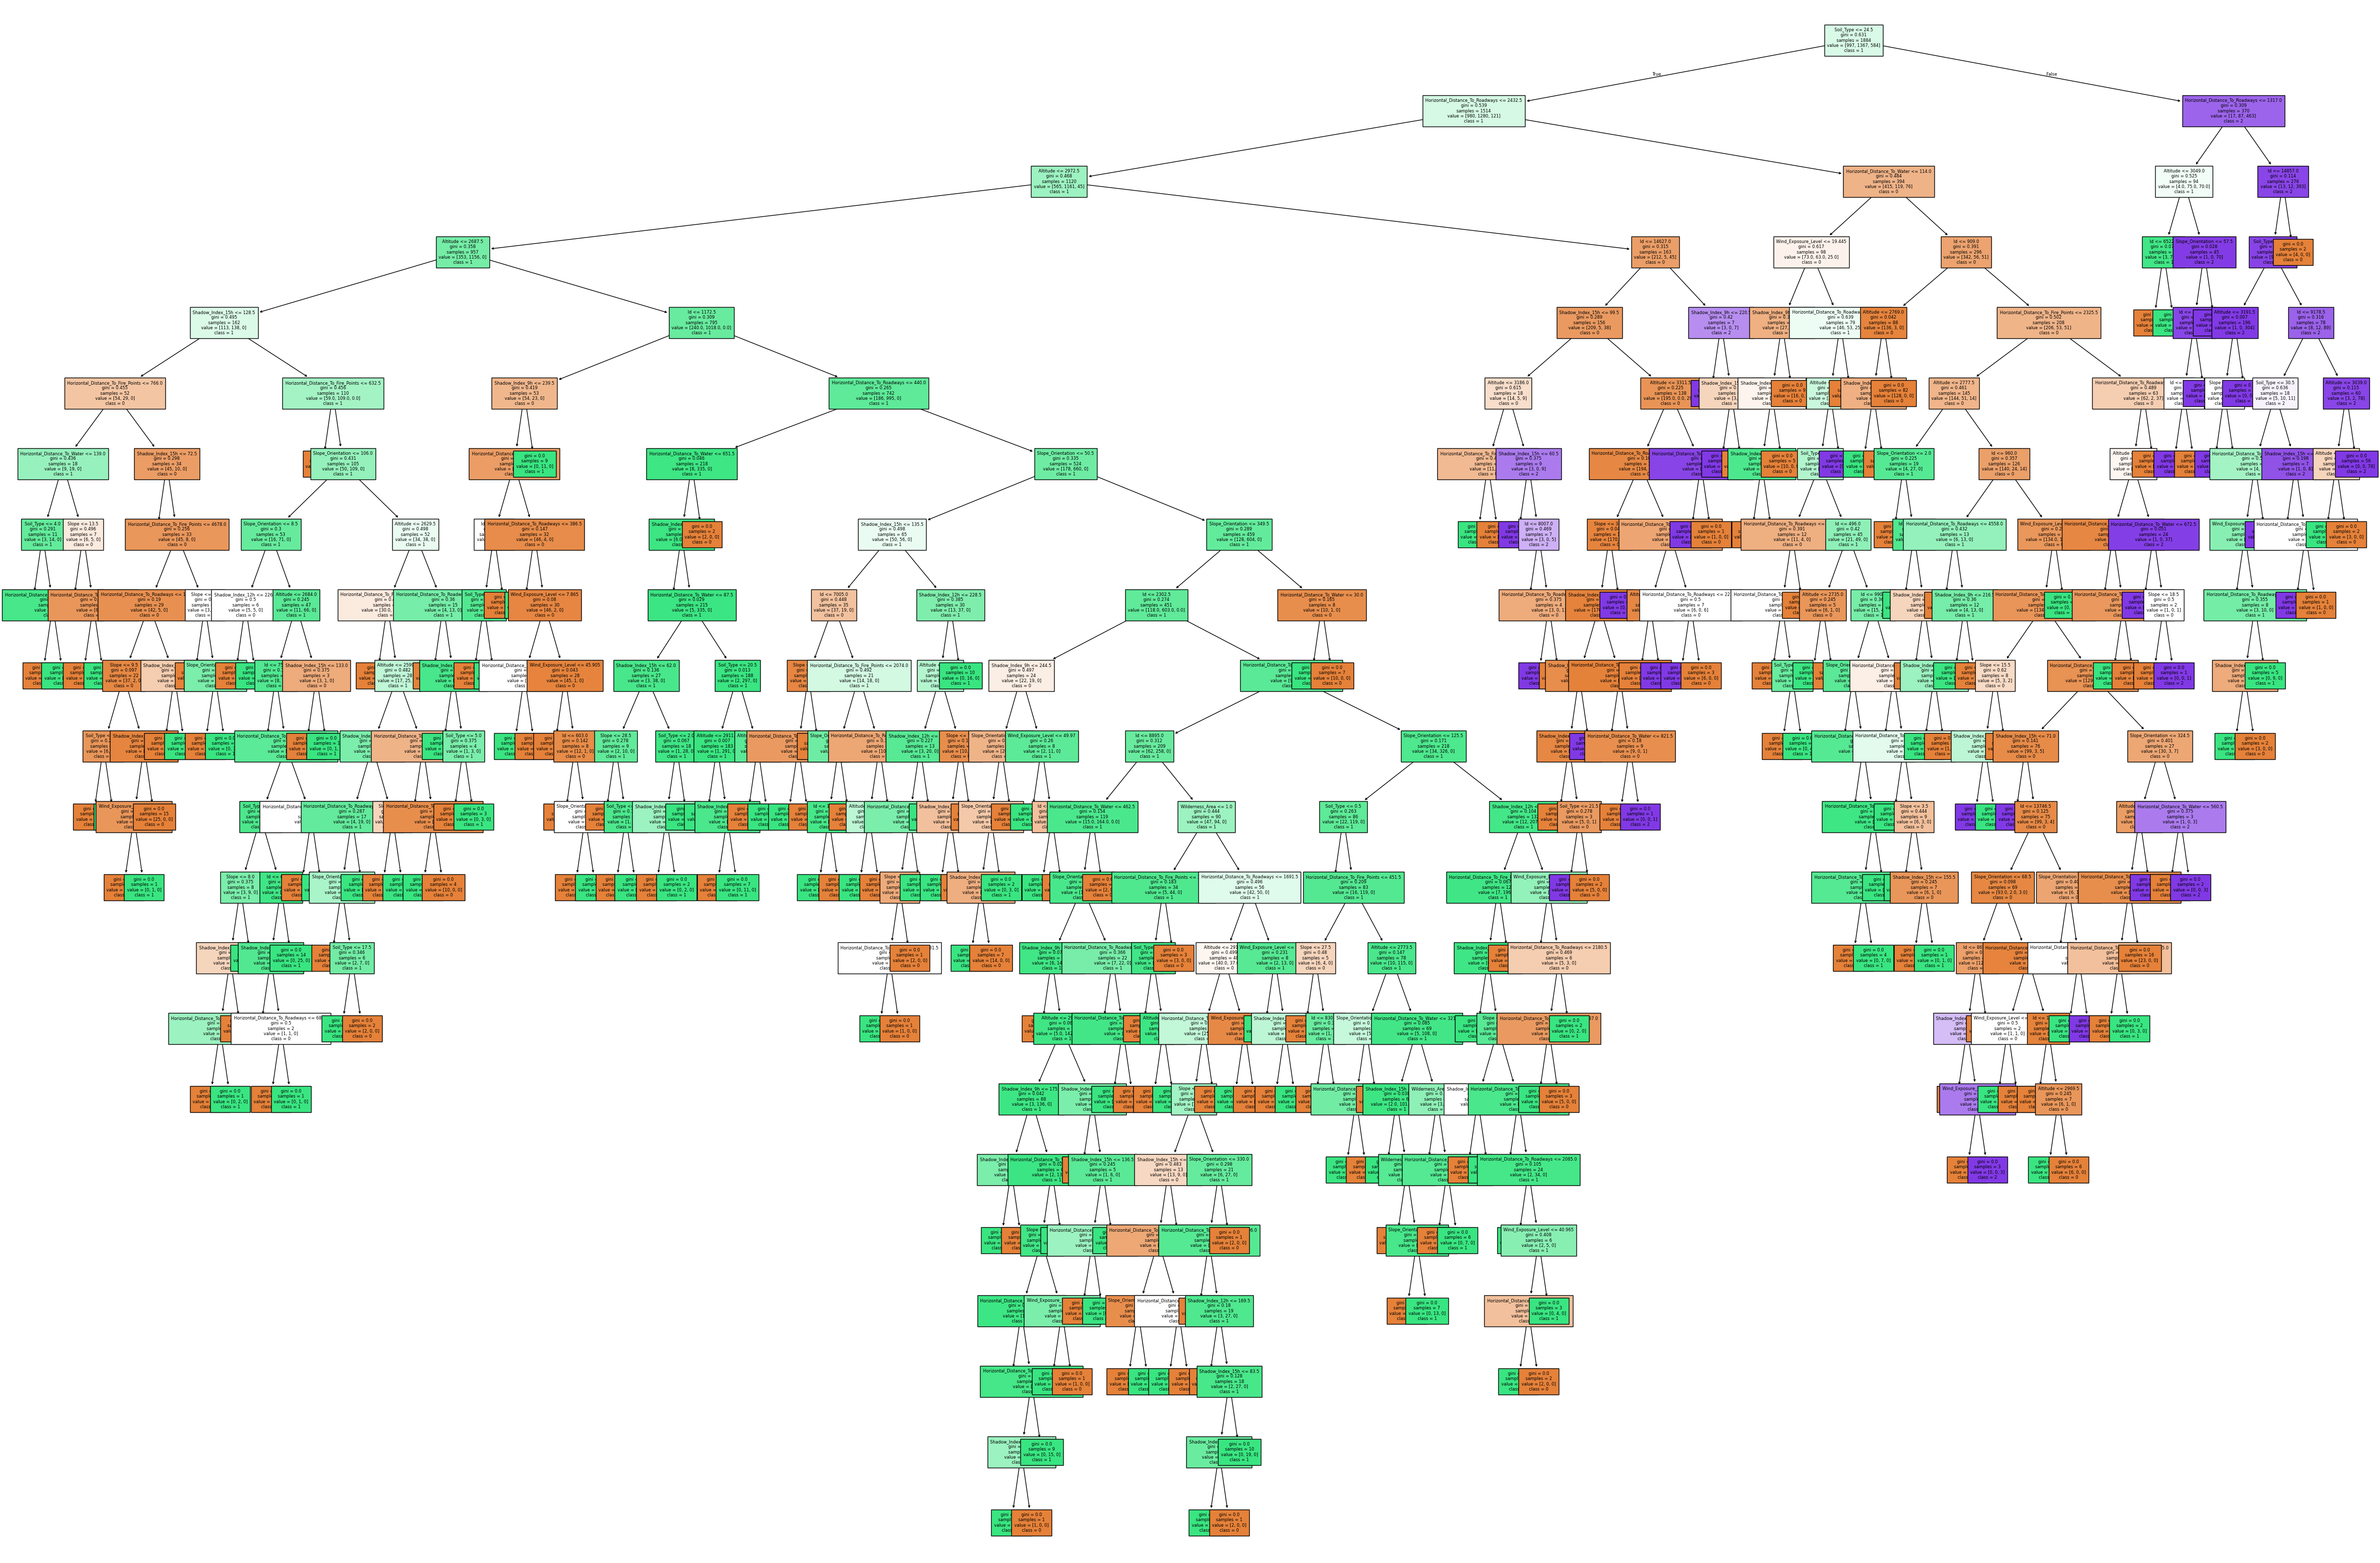

In [39]:
rf_model, rf_graph =myRegression.rf_function(X, Y)


Altitude                              0.342859
Soil_Type                             0.146523
Horizontal_Distance_To_Roadways       0.108021
Id                                    0.103418
Horizontal_Distance_To_Fire_Points    0.067705
Horizontal_Distance_To_Water          0.039292
Shadow_Index_12h                      0.034813
Shadow_Index_15h                      0.034407
Shadow_Index_9h                       0.032262
Slope_Orientation                     0.032169
Slope                                 0.024545
Wind_Exposure_Level                   0.018882
Wilderness_Area                       0.015103
dtype: float64

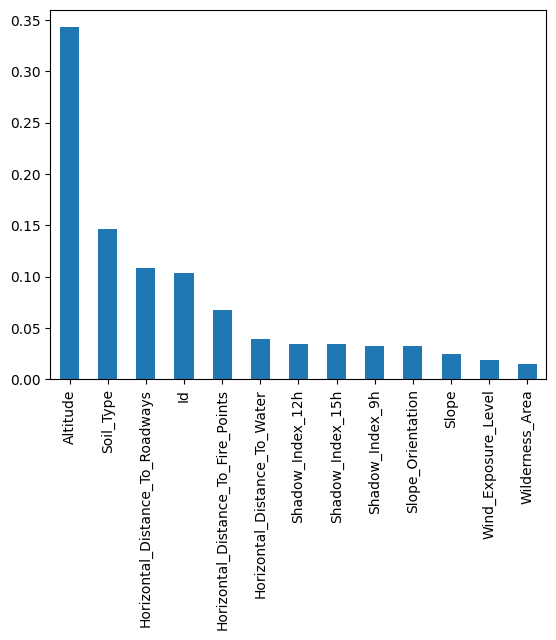

In [40]:
# Examine the feature importances
feature_importances = pd.Series(rf_graph.feature_importances_, index=predictors).sort_values(ascending=False)
feature_importances.plot.bar()

feature_importances

In [41]:
rf_graph=myRegression.grid_search_random_forest(X, Y)

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


KeyboardInterrupt: 

Accuracy: 92.87974683544303 
Train Accuracy: 99.59294436906377

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       421
           1       0.90      0.98      0.94       584
           2       0.97      0.97      0.97       259

    accuracy                           0.93      1264
   macro avg       0.94      0.93      0.93      1264
weighted avg       0.93      0.93      0.93      1264


Confusion Matrix:
 [[351  62   8]
 [ 13 571   0]
 [  7   0 252]]
Error Rate: 0.07120253164556962


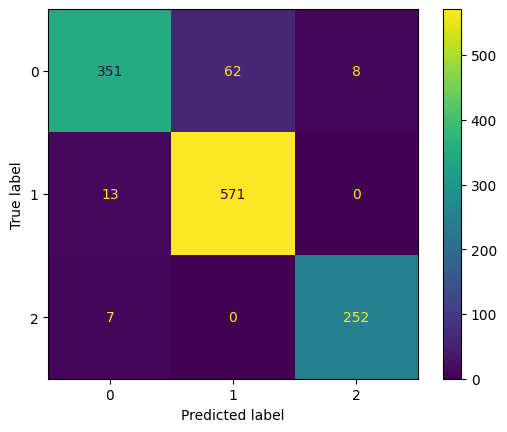

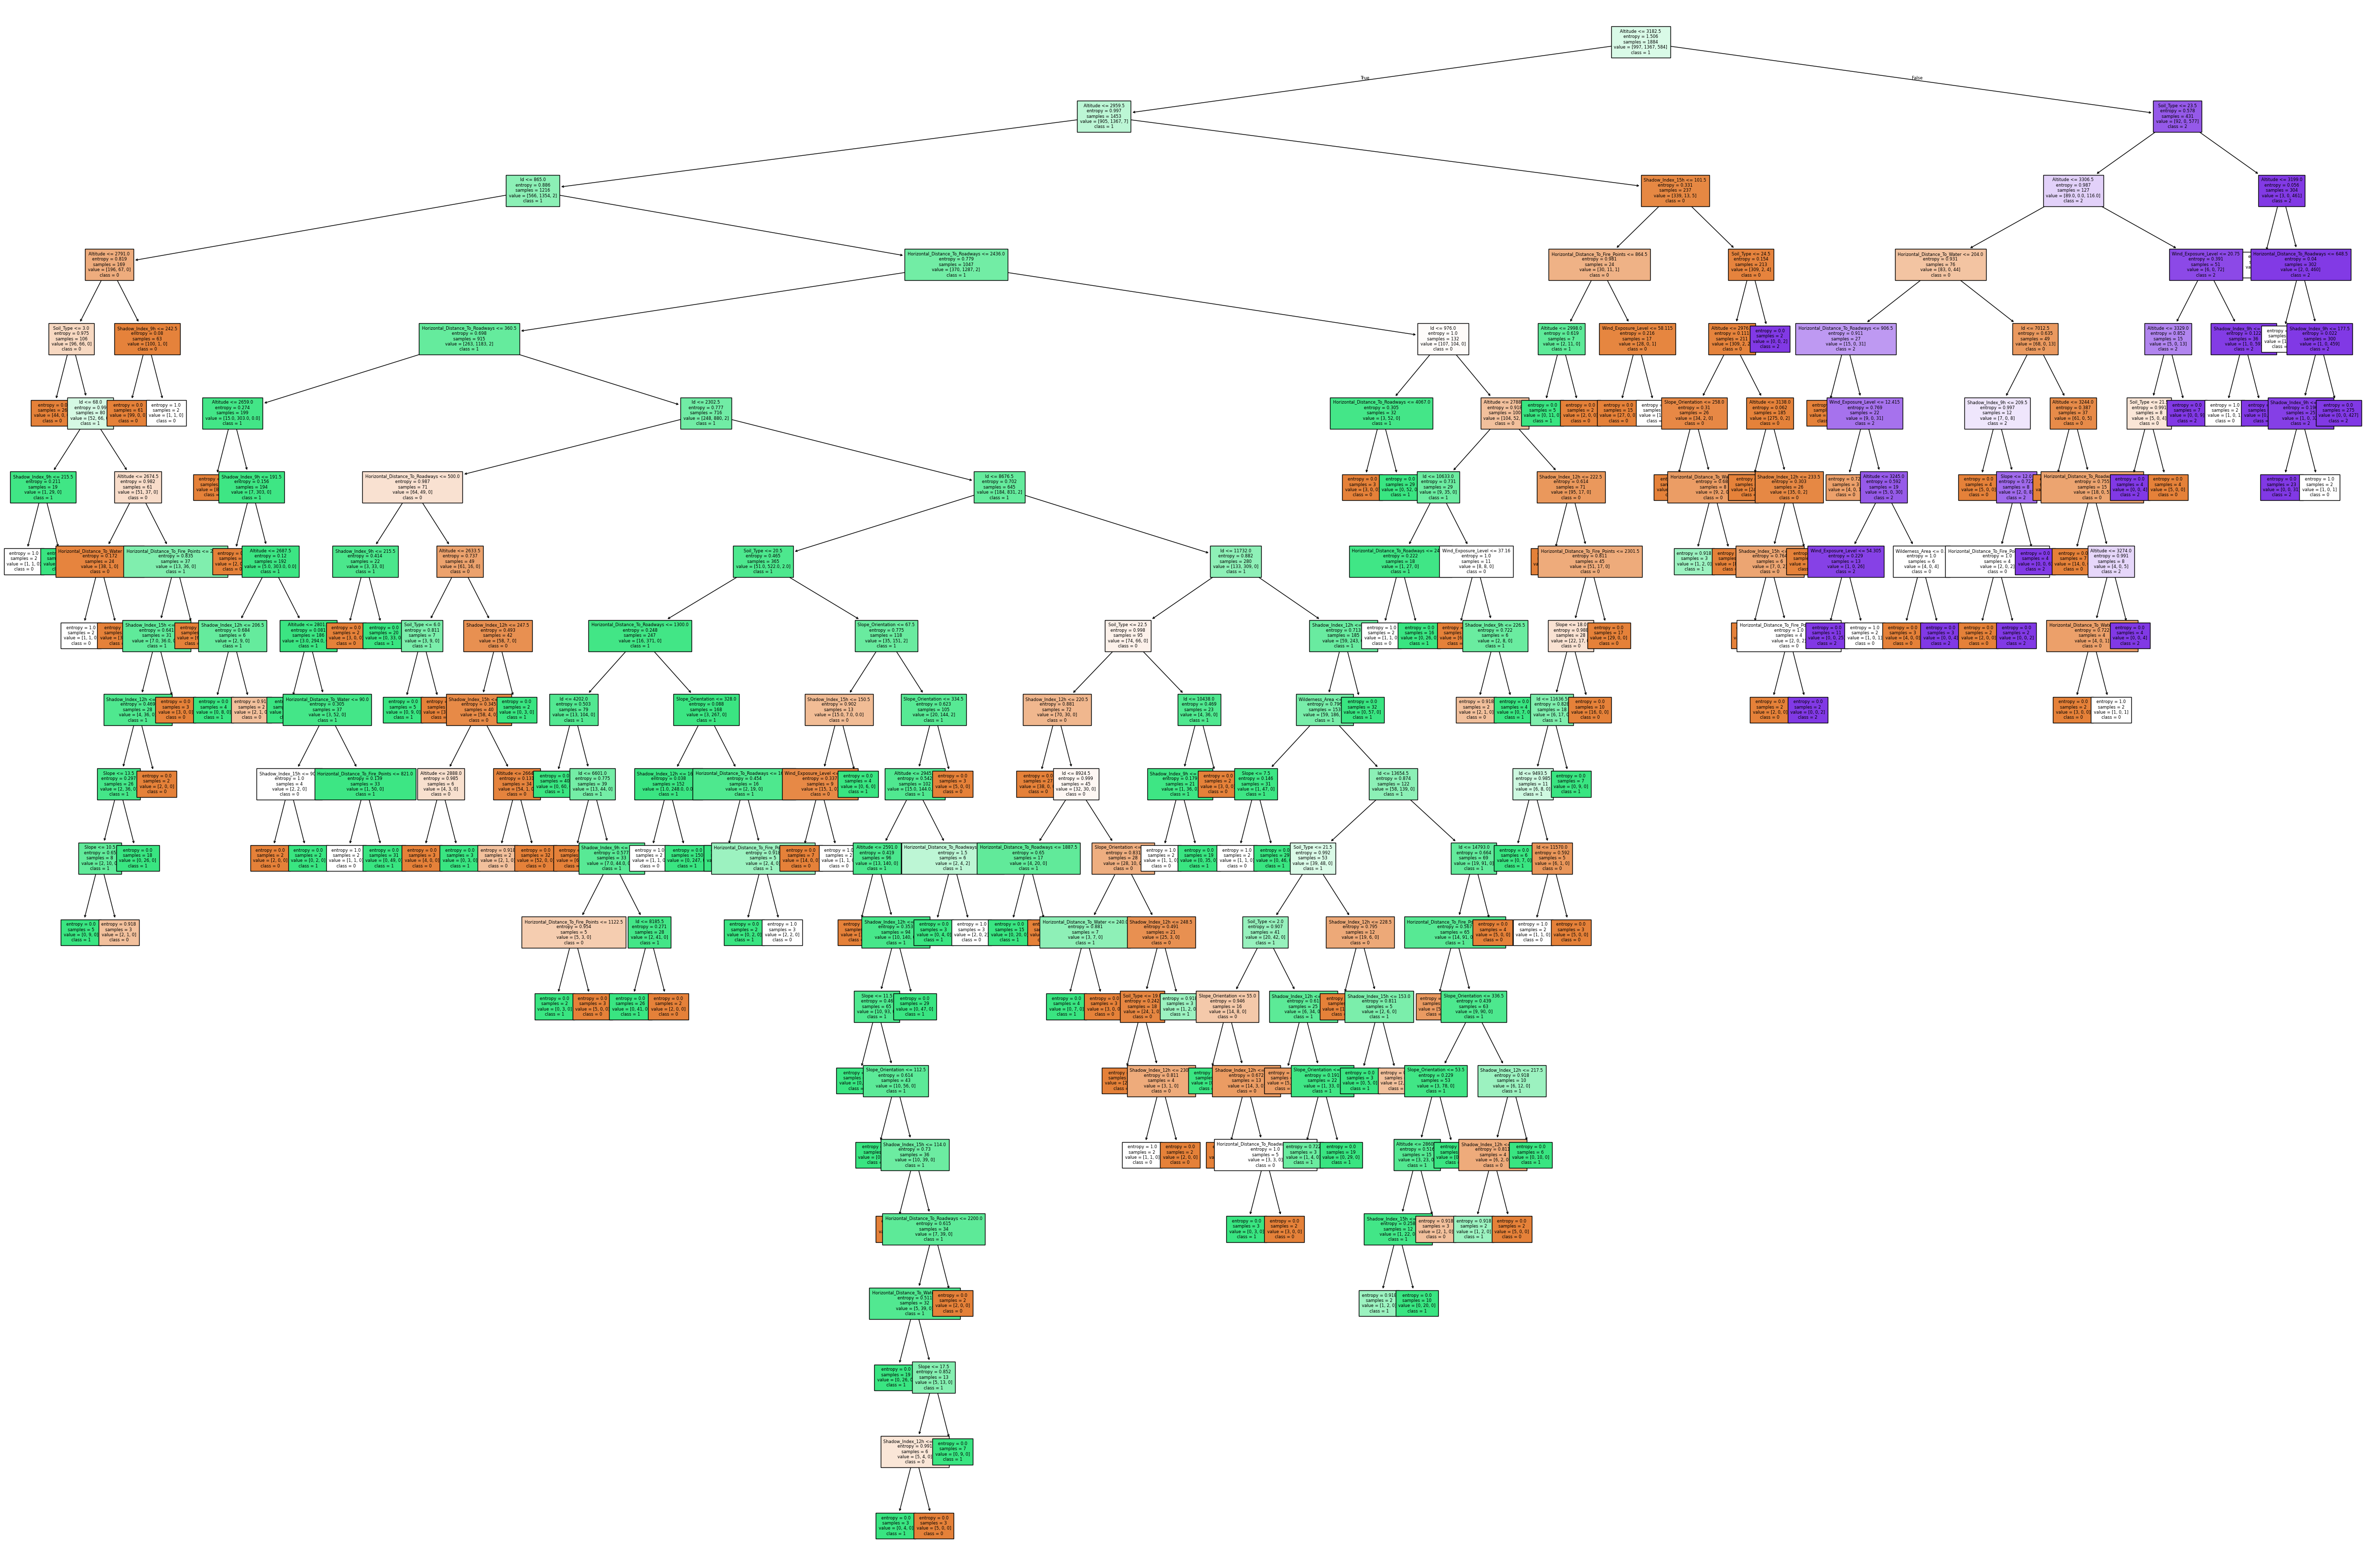

Shape of X_train: (2948, 13)
Shape of X_test: (1264, 13)


In [44]:
rf_model, rf_graph =myRegression.rf_function(X, Y, 1)


Altitude                              0.580049
Id                                    0.130094
Soil_Type                             0.066732
Horizontal_Distance_To_Roadways       0.049048
Horizontal_Distance_To_Fire_Points    0.044089
Horizontal_Distance_To_Water          0.028260
Slope_Orientation                     0.021866
Shadow_Index_9h                       0.019844
Shadow_Index_12h                      0.019200
Shadow_Index_15h                      0.014040
Wind_Exposure_Level                   0.012042
Slope                                 0.011710
Wilderness_Area                       0.003026
dtype: float64

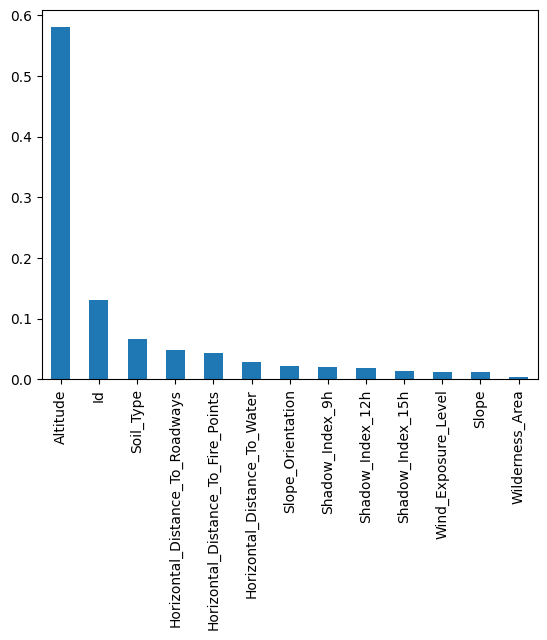

In [45]:
# Examine the feature importances
feature_importances = pd.Series(rf_graph.feature_importances_, index=predictors).sort_values(ascending=False)
feature_importances.plot.bar()

feature_importances

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 1/100 - Total Reward: 5
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 2/100 - Total Reward: 5
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 3/100 - Total Reward: 5
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 4/100 - Total Reward: 5
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 5/100 - Total Reward: -10
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 6/100 - Total Reward: 5
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 7/100 - Total Reward: -25
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 8/100 - Total Reward: -25
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 9/100 - Total Reward: 5
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 10/100 - Total Reward: 5
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 11/100 - Total Reward: -10
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 12/100 - Total Reward: -10
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 13/100 - Total Reward: -25
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Episode 

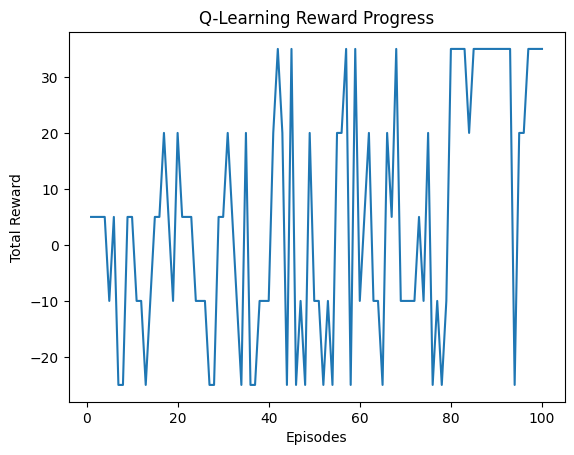

In [48]:
# Import necessary libraries
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Step 1: Define the environment class for feature selection
class FeatureSelectionEnvironment:
    def __init__(self, X, y, max_features=5):
        self.X = X  # Input features
        self.y = y  # Target labels
        self.max_features = max_features  # Maximum number of features to select
        self.n_features = X.shape[1]  # Total number of features
        self.current_state = np.zeros(self.n_features)  # Initial state (no features selected)

    def reset(self):
        self.current_state = np.zeros(self.n_features)
        return self.current_state

    def get_action_space(self):
        # The action space consists of unselected features
        return [i for i in range(self.n_features) if self.current_state[i] == 0]

    def step(self, action):
        # Update the state (mark the feature as selected)
        self.current_state[action] = 1
        selected_features = np.where(self.current_state == 1)[0]

        # Limit the number of features selected
        if len(selected_features) > self.max_features:
            return self.current_state, -10, True  # Penalty for too many features

        # Train models and evaluate accuracy
        X_selected = self.X[:, selected_features]
        
        # Split data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X_selected, self.y, test_size=0.2, random_state=42)

        # Train Random Forest Classifier
        rf = RandomForestClassifier(class_weight=None, criterion='entropy', max_depth=None, max_features=None,
                            max_samples=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100,
                            oob_score=True, random_state=42, verbose=0)
        rf.fit(X_train, y_train)

        rf_pred = rf.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_pred)

    
        svm = SVC(kernel='rbf',C=1,degree=2,gamma='scale',coef0=0.0,shrinking=True,probability=True,
                  tol=0.01,cache_size=200,class_weight=None,verbose=True,max_iter=2000,
                  decision_function_shape='ovr',break_ties=False,random_state=42)
        svm.fit(X_train, y_train)

        svm_pred = svm.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_pred)

        # Choose the best model based on accuracy
        accuracy = max(rf_accuracy, svm_accuracy)

        # Reward: Positive for improvement, negative for no improvement or overfitting
        if accuracy > 0.7:  # Example threshold for good performance
            reward = 10
        else:
            reward = -5

        # Check if the task is done
        done = len(selected_features) >= self.max_features  # End after selecting a set of features

        return self.current_state, reward, done

# Step 2: Define the Q-learning Agent class
class QLearningAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.9, epsilon=0.1, n_features=10):
        # Initialize Q-table with zeros. The Q-table will have shape (2^n_features, n_actions)
        self.q_table = np.zeros((2**n_features, n_actions))  # 2^n_features possible states (binary representations)
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration factor
        self.n_features = n_features  # Number of features

    def state_to_index(self, state):
        # Convert binary state (array of 0s and 1s) to an integer index
        state = state.astype(int)  # Convert to integers (0 or 1)
        return int("".join(state.astype(str)), 2)

    def select_action(self, available_actions, state_index):
        if random.uniform(0, 1) < self.epsilon:
            # Exploration: Choose a random action
            return random.choice(available_actions)
        else:
            # Exploitation: Choose the best action based on Q-values
            return available_actions[np.argmax(self.q_table[state_index, available_actions])]

    def update_q_table(self, state_index, action, reward, next_state_index, done):
        best_next_action = np.argmax(self.q_table[next_state_index]) if not done else 0
        self.q_table[state_index, action] += self.alpha * (reward + self.gamma * self.q_table[next_state_index, best_next_action] - self.q_table[state_index, action])

# Step 3: Function to train the Q-learning agent for feature selection
def train_q_learning_agent(X, y, max_features=5, episodes=100):
    env = FeatureSelectionEnvironment(X, y, max_features)
    agent = QLearningAgent(n_actions=X.shape[1], n_features=X.shape[1])

    rewards = []

    for episode in range(episodes):
        state = env.reset()
        state_index = agent.state_to_index(state)  # Convert initial state to an index
        done = False
        total_reward = 0
        
        while not done:
            available_actions = env.get_action_space()
            action = agent.select_action(available_actions, state_index)
            next_state, reward, done = env.step(action)
            next_state_index = agent.state_to_index(next_state)  # Convert next state to an index
            agent.update_q_table(state_index, action, reward, next_state_index, done)
            state = next_state
            state_index = next_state_index
            total_reward += reward

        rewards.append(total_reward)
        print(f"Episode {episode+1}/{episodes} - Total Reward: {total_reward}")

    # Plot the rewards over episodes to see the learning process
    plt.plot(range(1, episodes+1), rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Q-Learning Reward Progress')
    plt.show()

# Step 4: Example usage (replace with your dataset)
if __name__ == "__main__":
    # Example dataset (replace with your dataset)
    X, y = make_classification(n_samples=1000, n_features=13, n_informative=8, random_state=42)
    y = LabelEncoder().fit_transform(y)  # Ensure target labels are encoded as 0, 1, 2

    # Train Q-learning agent for feature selection
    train_q_learning_agent(X, y)

Episode 1/100 - Total Reward: 5
Episode 2/100 - Total Reward: 5
Episode 3/100 - Total Reward: 5
Episode 4/100 - Total Reward: 5
Episode 5/100 - Total Reward: -10
Episode 6/100 - Total Reward: 5
Episode 7/100 - Total Reward: -25
Episode 8/100 - Total Reward: 5
Episode 9/100 - Total Reward: 5
Episode 10/100 - Total Reward: 5
Episode 11/100 - Total Reward: -10
Episode 12/100 - Total Reward: -10
Episode 13/100 - Total Reward: -25
Episode 14/100 - Total Reward: 5
Episode 15/100 - Total Reward: 5
Episode 16/100 - Total Reward: 20
Episode 17/100 - Total Reward: -10
Episode 18/100 - Total Reward: 5
Episode 19/100 - Total Reward: -25
Episode 20/100 - Total Reward: 5
Episode 21/100 - Total Reward: 5
Episode 22/100 - Total Reward: 5
Episode 23/100 - Total Reward: -10
Episode 24/100 - Total Reward: -10
Episode 25/100 - Total Reward: -25
Episode 26/100 - Total Reward: -10
Episode 27/100 - Total Reward: 5
Episode 28/100 - Total Reward: 5
Episode 29/100 - Total Reward: -10
Episode 30/100 - Total Rewa

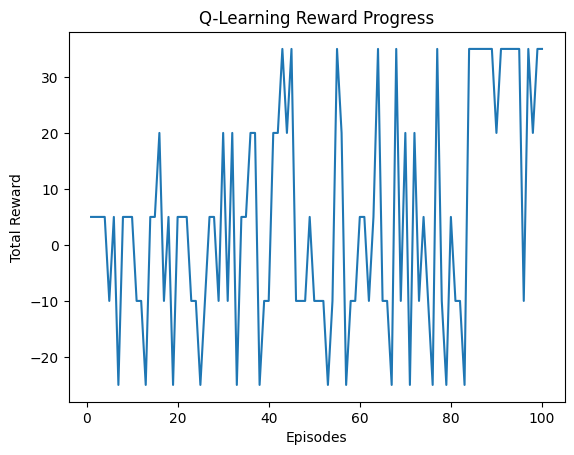

In [49]:
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Define the environment class for feature selection
class FeatureSelectionEnvironment:
    def __init__(self, X, y, max_features=5):
        self.X = X  # Input features
        self.y = y  # Target labels
        self.max_features = max_features  # Maximum number of features to select
        self.n_features = X.shape[1]  # Total number of features
        self.current_state = np.zeros(self.n_features)  # Initial state (no features selected)

    def reset(self):
        self.current_state = np.zeros(self.n_features)
        return self.current_state

    def get_action_space(self):
        # The action space consists of unselected features
        return [i for i in range(self.n_features) if self.current_state[i] == 0]

    def step(self, action):
        # Update the state (mark the feature as selected)
        self.current_state[action] = 1
        selected_features = np.where(self.current_state == 1)[0]

        # Limit the number of features selected
        if len(selected_features) > self.max_features:
            return self.current_state, -10, True  # Penalty for too many features

        # Train models and evaluate accuracy
        X_selected = self.X[:, selected_features]
        
        # Split data into training and testing
        X_train, X_test, y_train, y_test = train_test_split(X_selected, self.y, test_size=0.2, random_state=42)

        # Train Random Forest Classifier
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        rf_pred = rf_model.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_pred)

        # Train SVM Classifier
        svm_model = SVC(random_state=42)
        svm_model.fit(X_train, y_train)
        svm_pred = svm_model.predict(X_test)
        svm_accuracy = accuracy_score(y_test, svm_pred)

        # Choose the best model based on accuracy
        accuracy = max(rf_accuracy, svm_accuracy)

        # Reward: Positive for improvement, negative for no improvement or overfitting
        if accuracy > 0.7:  # Example threshold for good performance
            reward = 10
        else:
            reward = -5

        # Check if the task is done
        done = len(selected_features) >= self.max_features  # End after selecting a set of features

        return self.current_state, reward, done

# Step 2: Define the Q-learning Agent class
class QLearningAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.9, epsilon=0.1, n_features=10):
        # Initialize Q-table with zeros. The Q-table will have shape (2^n_features, n_actions)
        self.q_table = np.zeros((2**n_features, n_actions))  # 2^n_features possible states (binary representations)
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration factor
        self.n_features = n_features  # Number of features

    def state_to_index(self, state):
        # Convert binary state (array of 0s and 1s) to an integer index
        state = state.astype(int)  # Convert to integers (0 or 1)
        return int("".join(state.astype(str)), 2)

    def select_action(self, available_actions, state_index):
        if random.uniform(0, 1) < self.epsilon:
            # Exploration: Choose a random action
            return random.choice(available_actions)
        else:
            # Exploitation: Choose the best action based on Q-values
            return available_actions[np.argmax(self.q_table[state_index, available_actions])]

    def update_q_table(self, state_index, action, reward, next_state_index, done):
        best_next_action = np.argmax(self.q_table[next_state_index]) if not done else 0
        self.q_table[state_index, action] += self.alpha * (reward + self.gamma * self.q_table[next_state_index, best_next_action] - self.q_table[state_index, action])

# Step 3: Function to train the Q-learning agent for feature selection
def train_q_learning_agent(X, y, max_features=5, episodes=100):
    env = FeatureSelectionEnvironment(X, y, max_features)
    agent = QLearningAgent(n_actions=X.shape[1], n_features=X.shape[1])

    rewards = []

    for episode in range(episodes):
        state = env.reset()
        state_index = agent.state_to_index(state)  # Convert initial state to an index
        done = False
        total_reward = 0
        
        while not done:
            available_actions = env.get_action_space()
            action = agent.select_action(available_actions, state_index)
            next_state, reward, done = env.step(action)
            next_state_index = agent.state_to_index(next_state)  # Convert next state to an index
            agent.update_q_table(state_index, action, reward, next_state_index, done)
            state = next_state
            state_index = next_state_index
            total_reward += reward

        rewards.append(total_reward)
        print(f"Episode {episode+1}/{episodes} - Total Reward: {total_reward}")

    # Plot the rewards over episodes to see the learning process
    plt.plot(range(1, episodes+1), rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Q-Learning Reward Progress')
    plt.show()

# Step 4: Example usage (replace with your dataset)
if __name__ == "__main__":
    # Example dataset (replace with your dataset)
    X, y = make_classification(n_samples=1000, n_features=13, n_informative=8, random_state=42)
    y = LabelEncoder().fit_transform(y)  # Ensure target labels are encoded as 0, 1, 2

    # Train Q-learning agent for feature selection
    train_q_learning_agent(X, y)
